In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_csv("/content/israel_palestine_conflict.csv")

In [33]:
df.head()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000,DECEMBER,781,NaN,51,8
1,2000,NOVEMBER,3838,NaN,112,22
2,2000,OCTOBER,5984,NaN,104,10
3,2000,SEPTEMBER,NaN,NaN,16,1
4,2001,DECEMBER,304,NaN,67,36


In [34]:
df.tail()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
244,2021,JANUARY,NaN,NaN,4,0
245,2021,FEBRUARY,NaN,NaN,1,0
246,2021,MARCH,NaN,NaN,4,0
247,2021,APRIL,NaN,NaN,1,0
248,2021,MAY,NaN,NaN,26,3


In [35]:
df.shape

(249, 6)

In [36]:
df.columns

Index(['Year', 'Month', 'Palestinians Injuries', 'Israelis Injuries',
       'Palestinians Killed', 'Israelis Killed'],
      dtype='object')

In [37]:
df.duplicated().sum()

0

In [38]:
df.isnull()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,False,False,False,True,False,False
1,False,False,False,True,False,False
2,False,False,False,True,False,False
3,False,False,True,True,False,False
4,False,False,False,True,False,False
...,...,...,...,...,...,...
244,False,False,True,True,False,False
245,False,False,True,True,False,False
246,False,False,True,True,False,False
247,False,False,True,True,False,False


In [39]:
df.isnull().sum()

Year                       0
Month                      0
Palestinians Injuries     54
Israelis Injuries        117
Palestinians Killed        0
Israelis Killed            0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   249 non-null    int64 
 1   Month                  249 non-null    object
 2   Palestinians Injuries  195 non-null    object
 3   Israelis Injuries      132 non-null    object
 4   Palestinians Killed    249 non-null    int64 
 5   Israelis Killed        249 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 11.8+ KB


In [41]:
df = df.fillna({
    'Palestinians Injuries': '0',
    'Israelis Injuries': '0'
})

In [42]:
df.isnull().sum()

Year                     0
Month                    0
Palestinians Injuries    0
Israelis Injuries        0
Palestinians Killed      0
Israelis Killed          0
dtype: int64

In [43]:
df = df.fillna({
    'Palestinians Injuries': '0',
    'Israelis Injuries': '0'
})

In [44]:
numerical_columns = ['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']
df[numerical_columns] = df[numerical_columns].replace({',': ''}, regex=True)
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [45]:
df

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000,DECEMBER,781.0,0.0,51,8
1,2000,NOVEMBER,3838.0,0.0,112,22
2,2000,OCTOBER,5984.0,0.0,104,10
3,2000,SEPTEMBER,0.0,0.0,16,1
4,2001,DECEMBER,304.0,0.0,67,36
...,...,...,...,...,...,...
244,2021,JANUARY,0.0,0.0,4,0
245,2021,FEBRUARY,0.0,0.0,1,0
246,2021,MARCH,0.0,0.0,4,0
247,2021,APRIL,0.0,0.0,1,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    int64  
 1   Month                  249 non-null    object 
 2   Palestinians Injuries  247 non-null    float64
 3   Israelis Injuries      247 non-null    float64
 4   Palestinians Killed    249 non-null    int64  
 5   Israelis Killed        249 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 11.8+ KB


In [47]:
df.describe()

,Year,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
count,249.000000,247.000000,247.000000,249.000000,249.000000
mean,2010.542169,451.315789,20.890688,40.160643,5.120482
std,6.014702,1471.798713,150.387900,129.148851,11.653323
min,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,61.500000,0.000000,4.000000,0.000000
50%,2011.000000,161.000000,3.000000,12.000000,1.000000
75%,2016.000000,302.500000,15.000000,37.000000,5.000000
max,2021.000000,13735.000000,2347.000000,1590.000000,122.000000


In [48]:
# prompt: df.nunique()

df.nunique()


Year                      22
Month                     14
Palestinians Injuries    169
Israelis Injuries         53
Palestinians Killed       77
Israelis Killed           33
dtype: int64

In [49]:
# prompt: create a box plot

fig = px.box(df, x="Year", y="Palestinians Injuries")
fig.show()


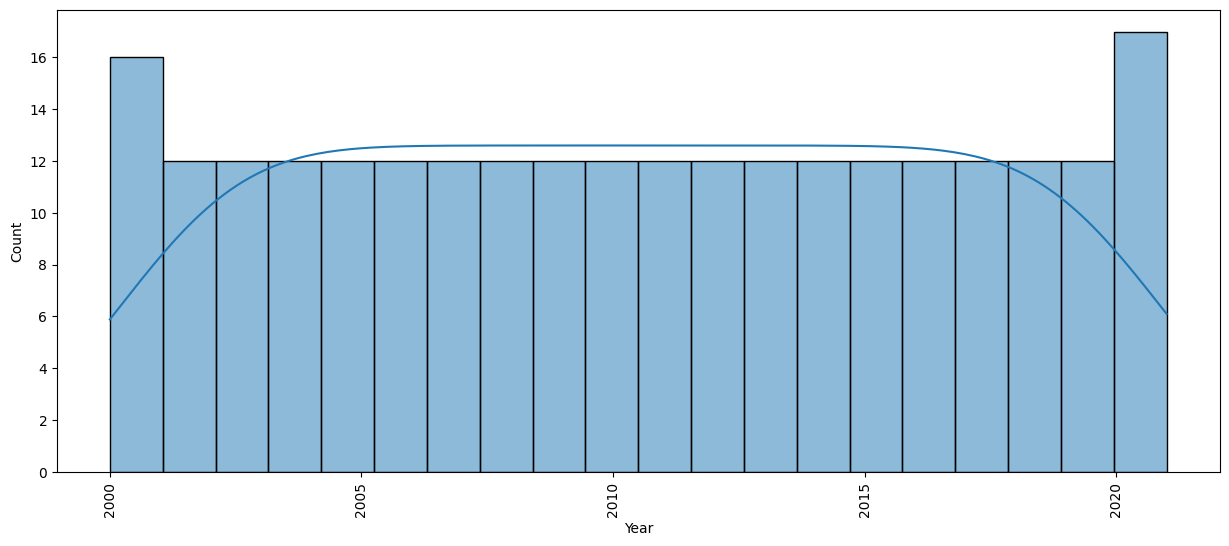

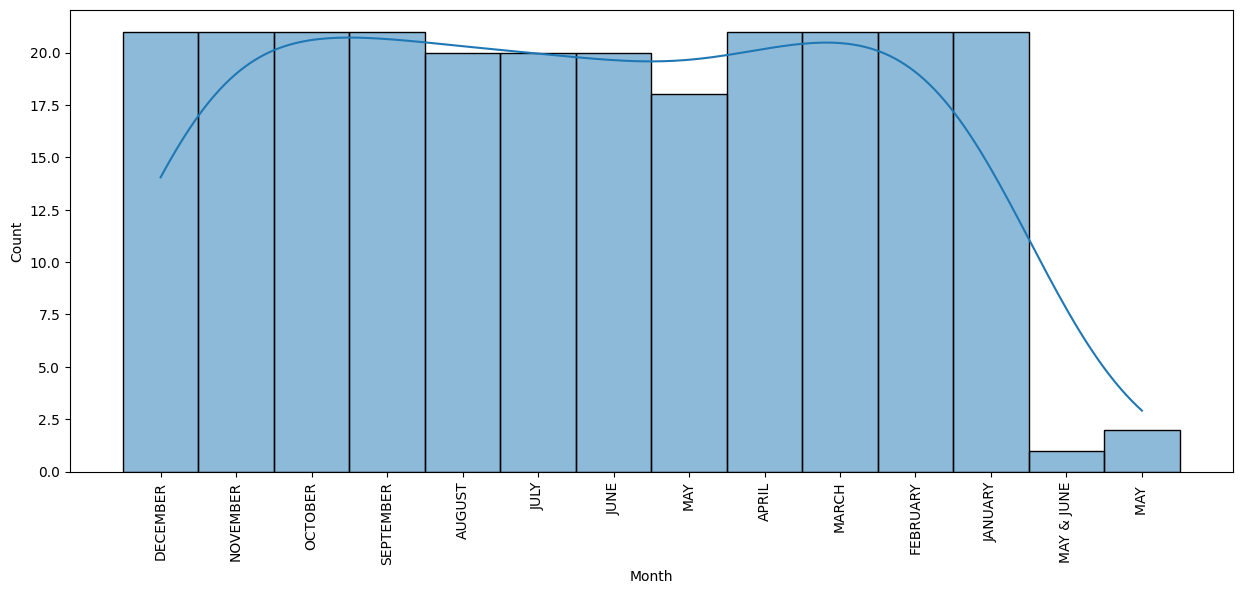

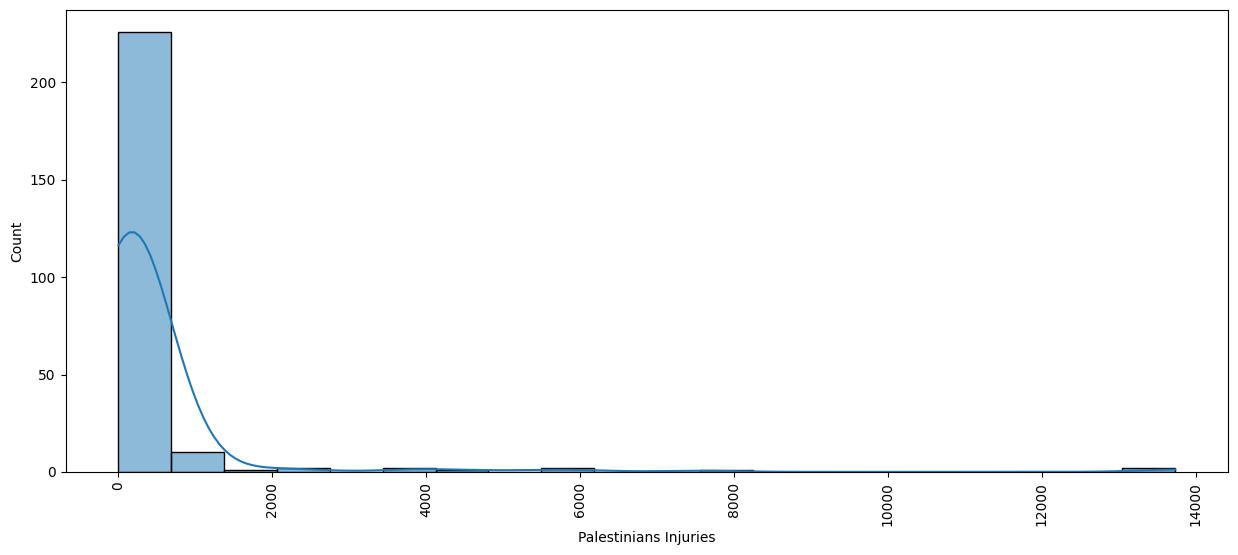

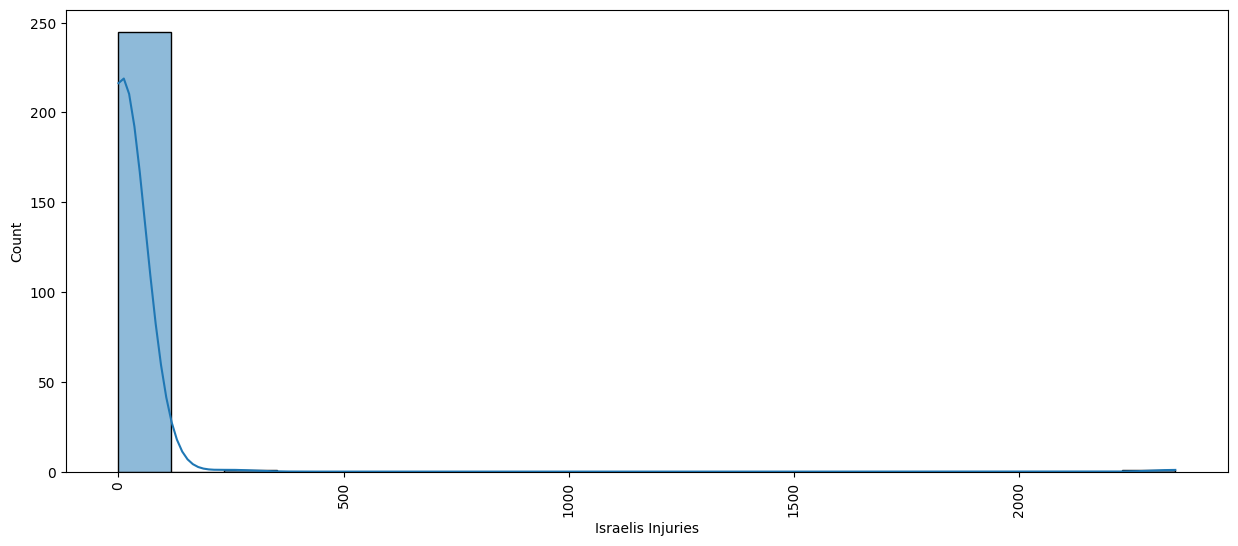

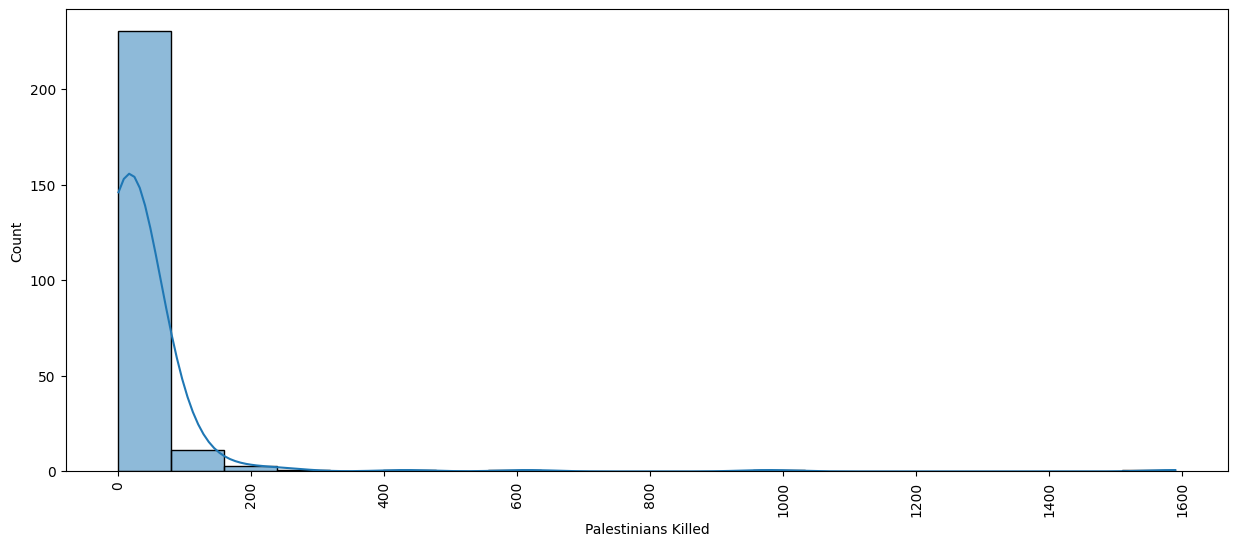

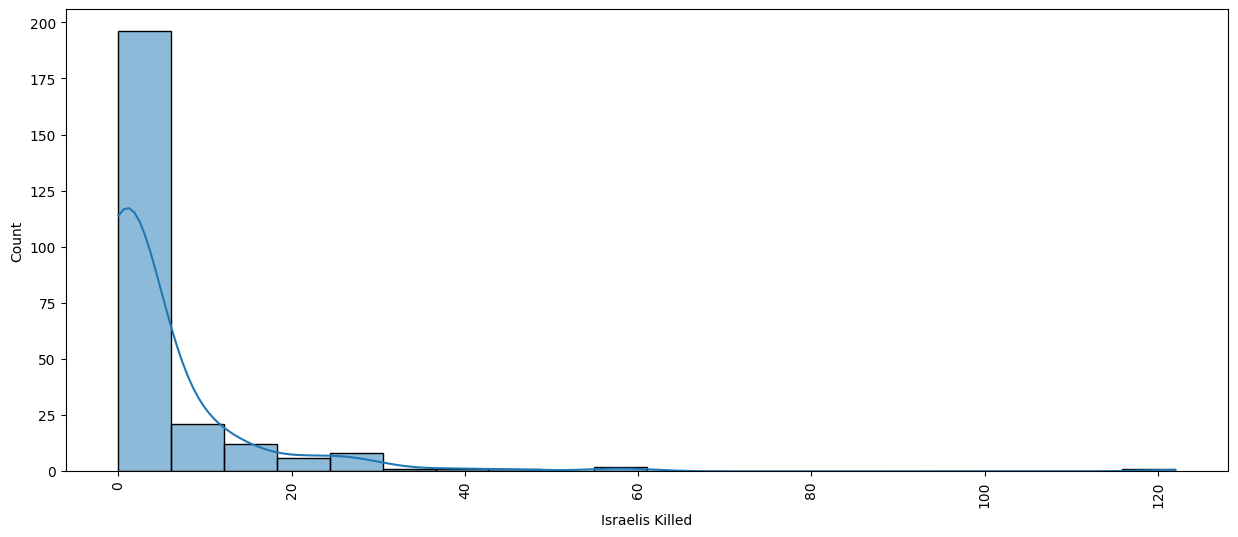

In [50]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [51]:
df1 = df[['Year', 'Palestinians Injuries', 'Israelis Injuries','Palestinians Killed',
          'Israelis Killed']]

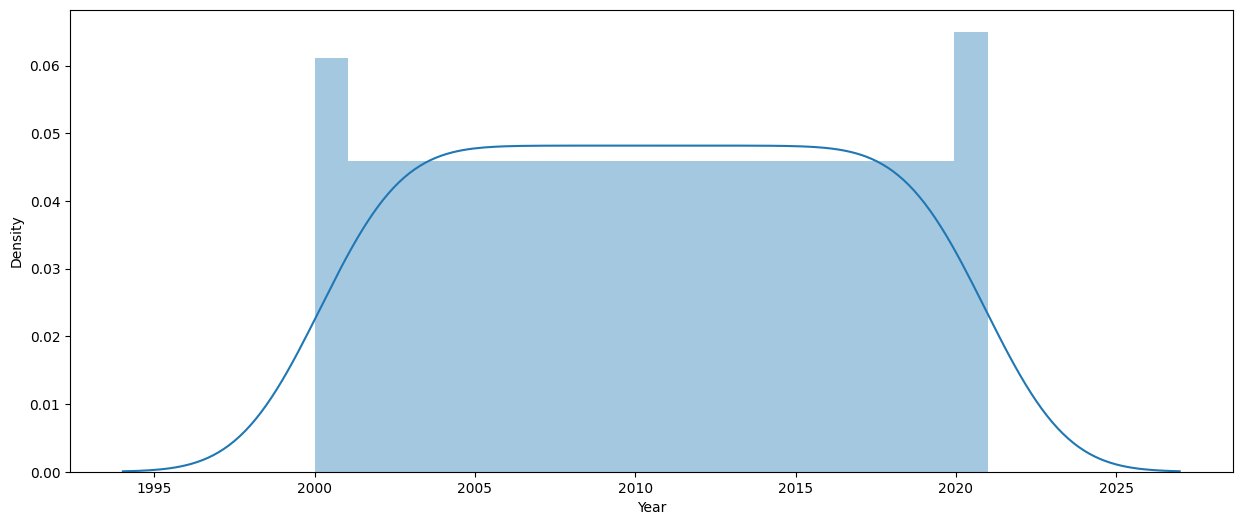

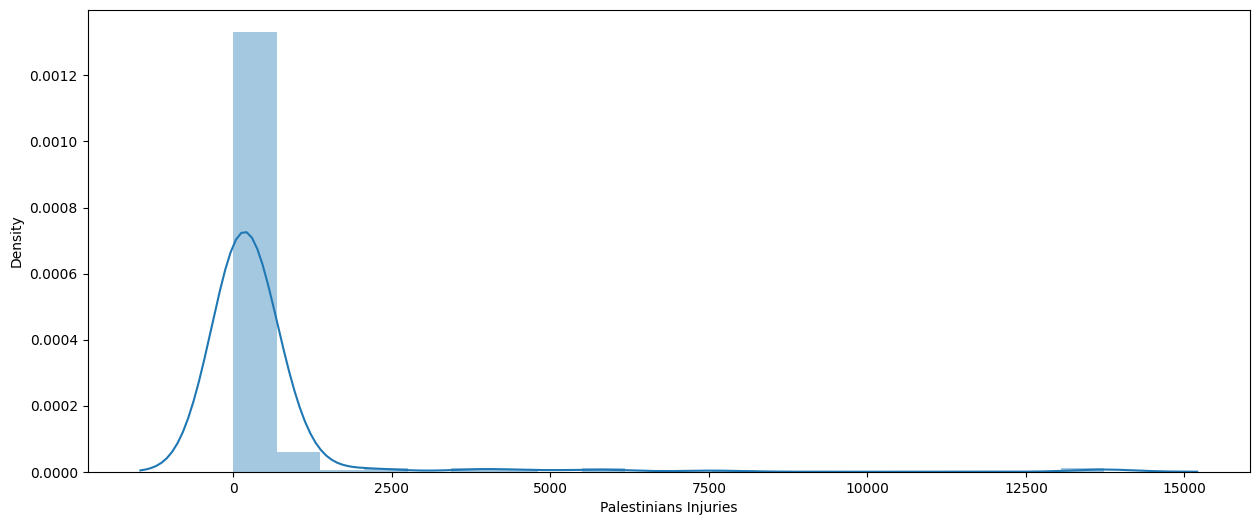

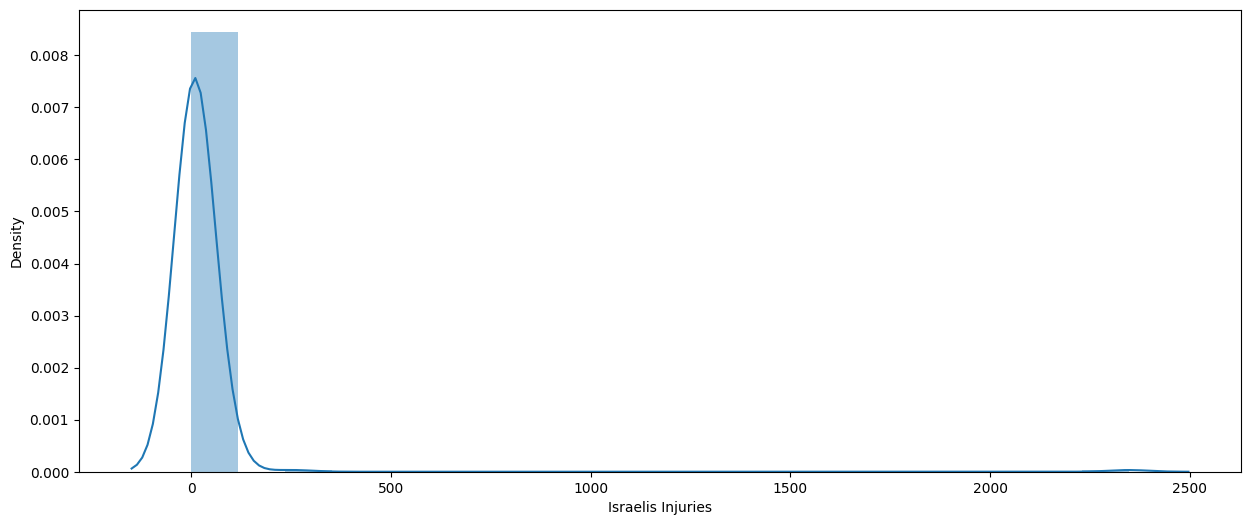

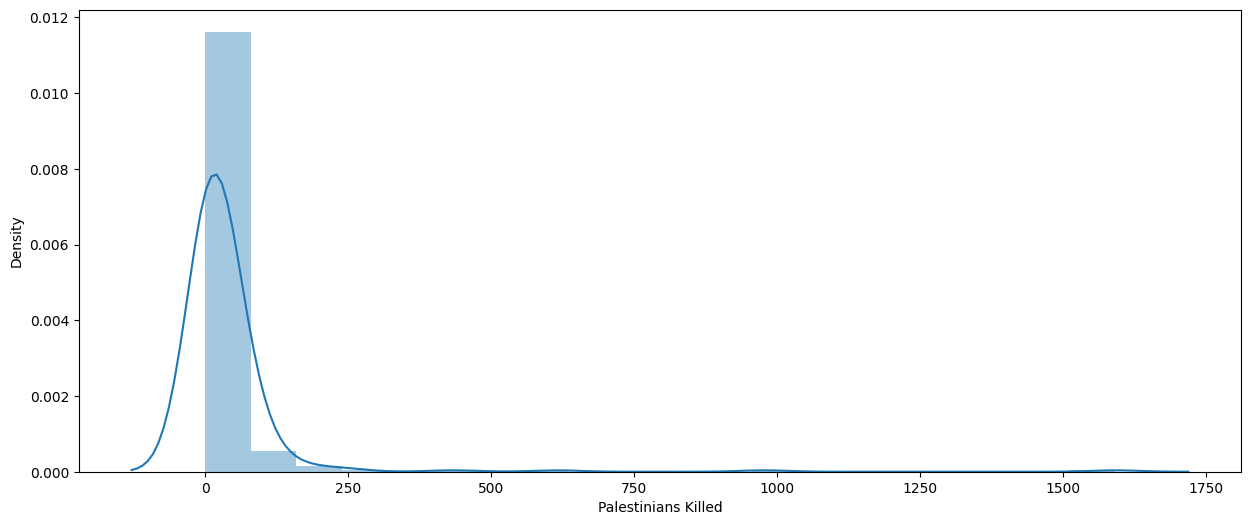

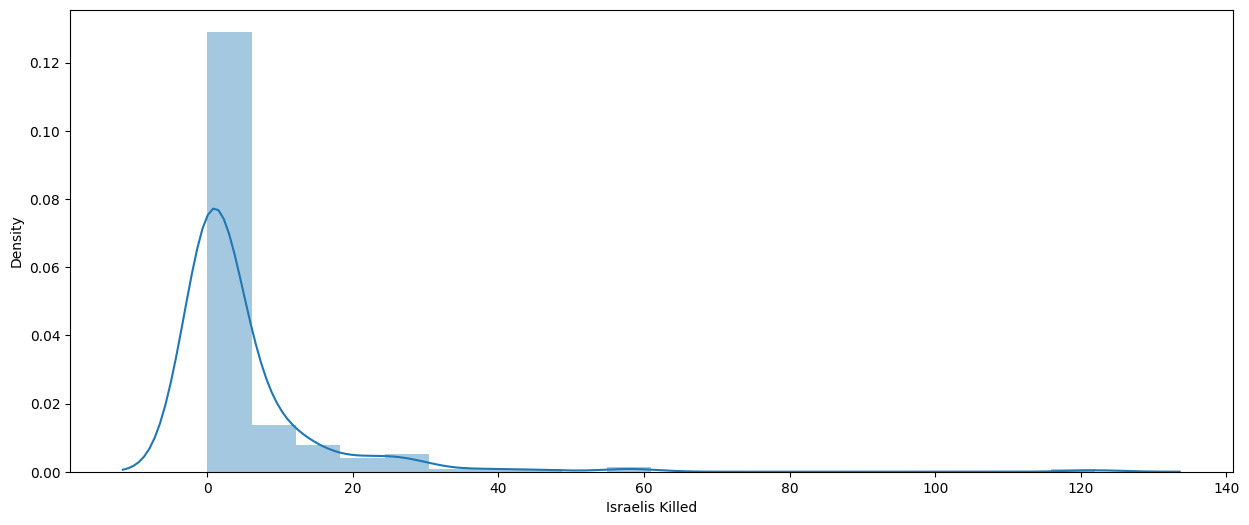

In [52]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df1[i], kde = True, bins = 20)
    plt.xticks(rotation = 0)
    plt.show()

In [65]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(df1[i], data = df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

TypeError: ignored

<Figure size 1500x600 with 0 Axes>

In [64]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(df1[i], data = df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

TypeError: ignored

<Figure size 1500x600 with 0 Axes>

In [62]:
for i in df.columns:
    fig = go.Figure(data=[go.Histogram(x=df[i])])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Value")
    fig.show()

In [63]:
for i in df1.columns:
    fig = go.Figure(data=[go.Box(x=df1[i])])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Value")
    fig.show()

In [61]:
for i in df1.columns:
    fig = go.Figure(data=[go.Violin(x=df1[i])])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Value")
    fig.show()

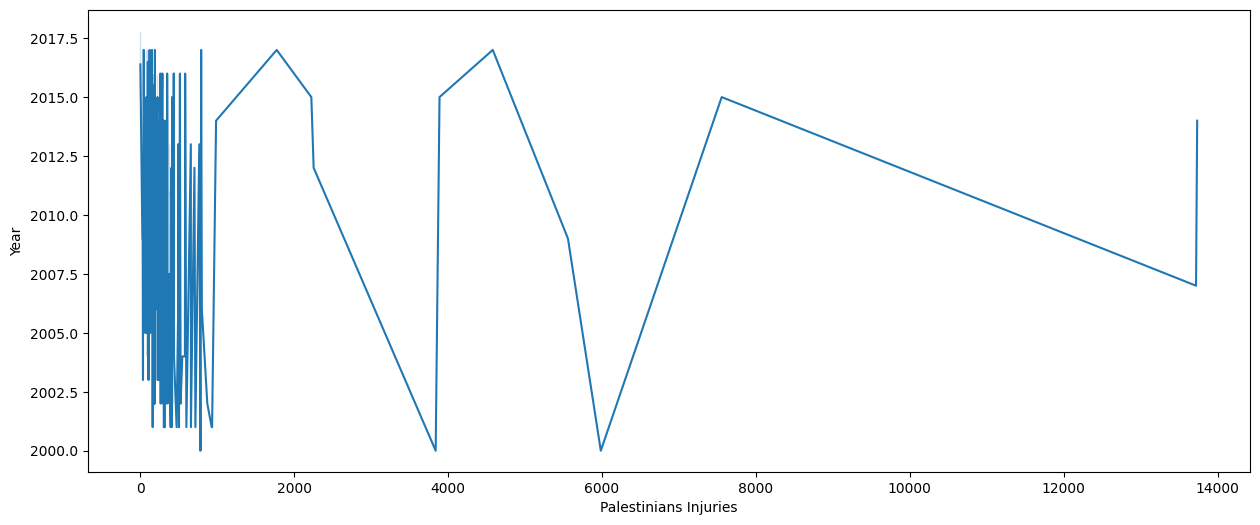

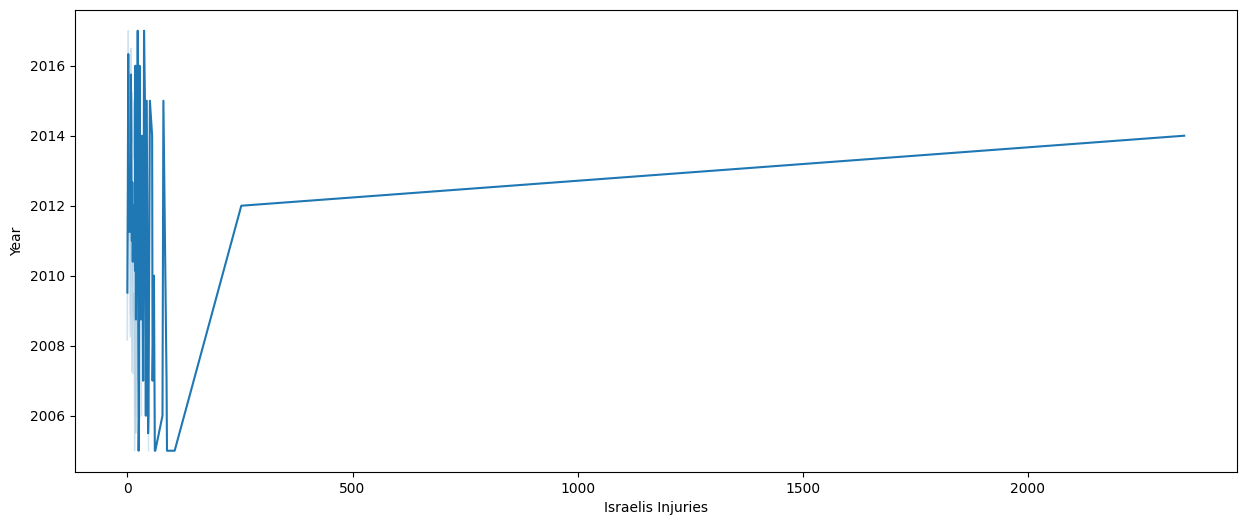

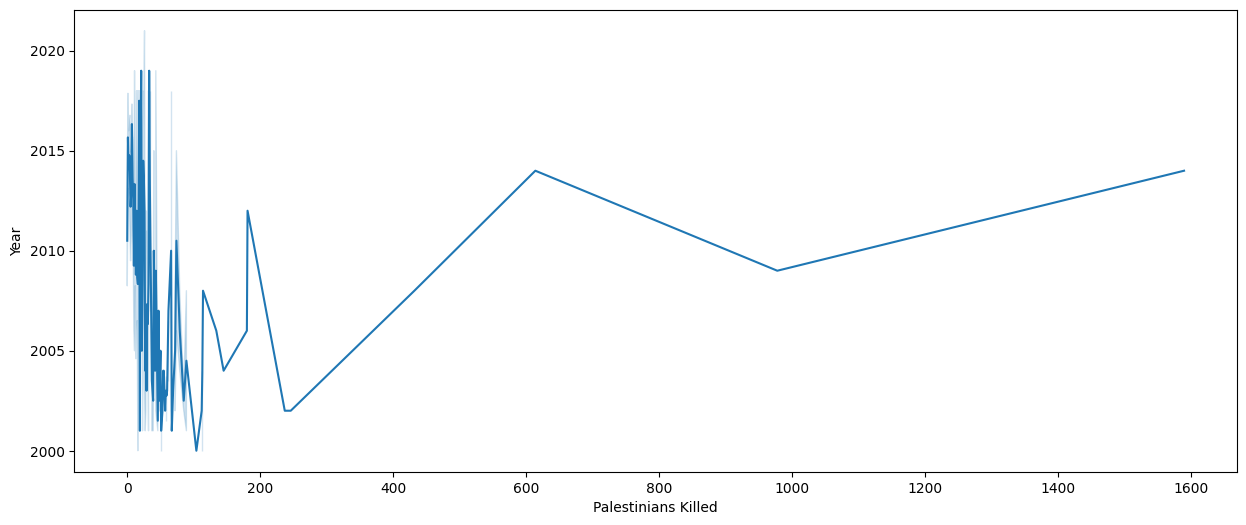

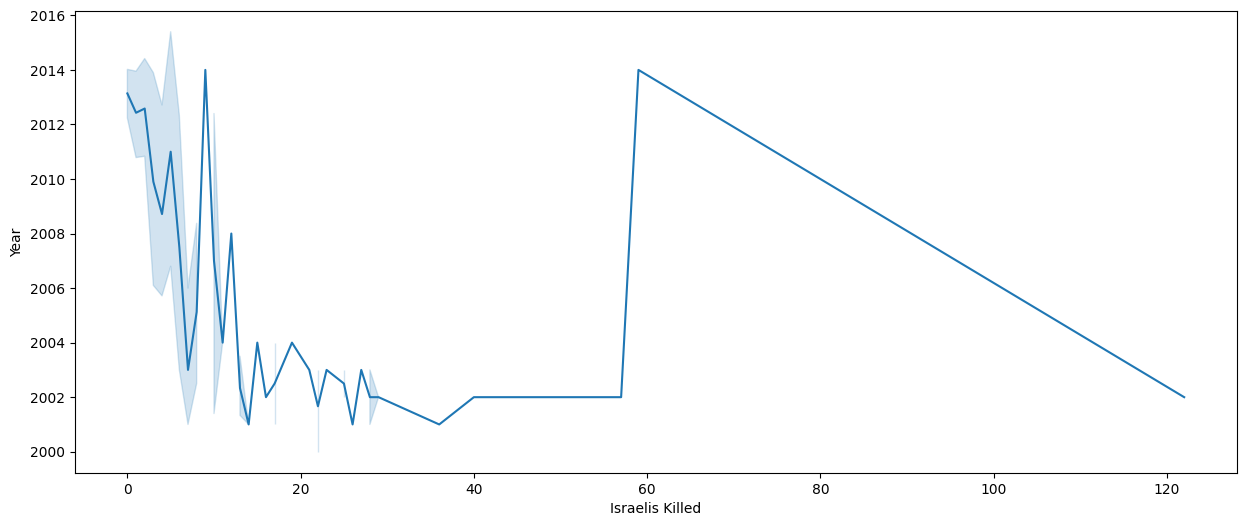

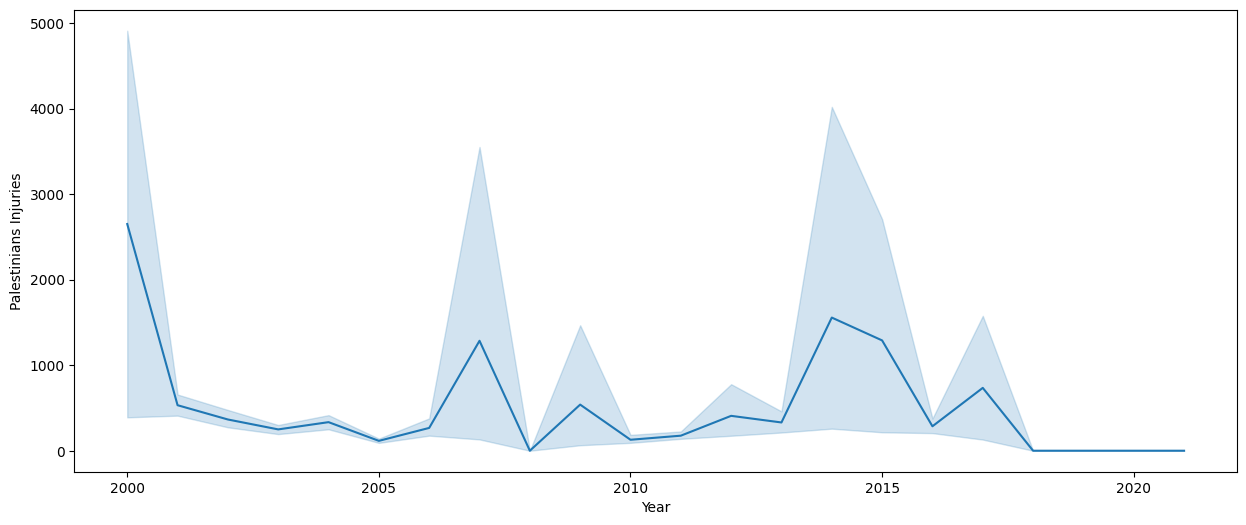

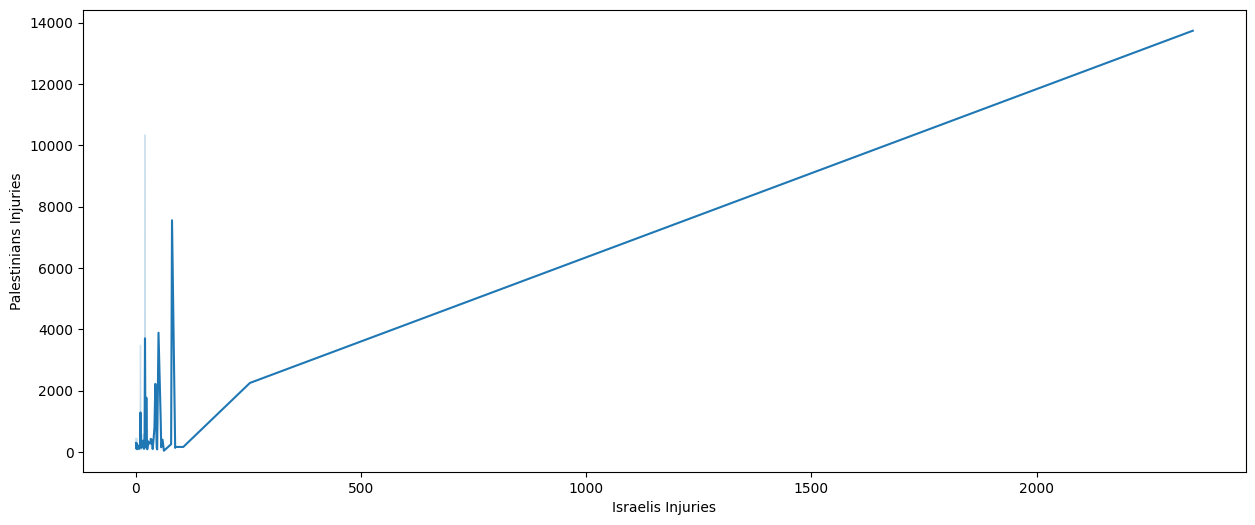

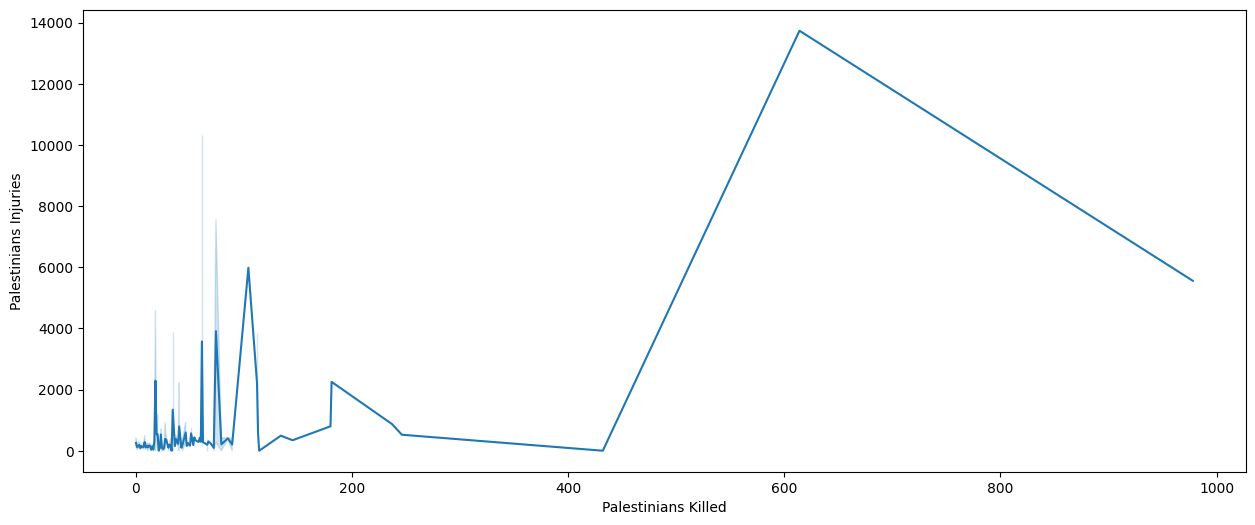

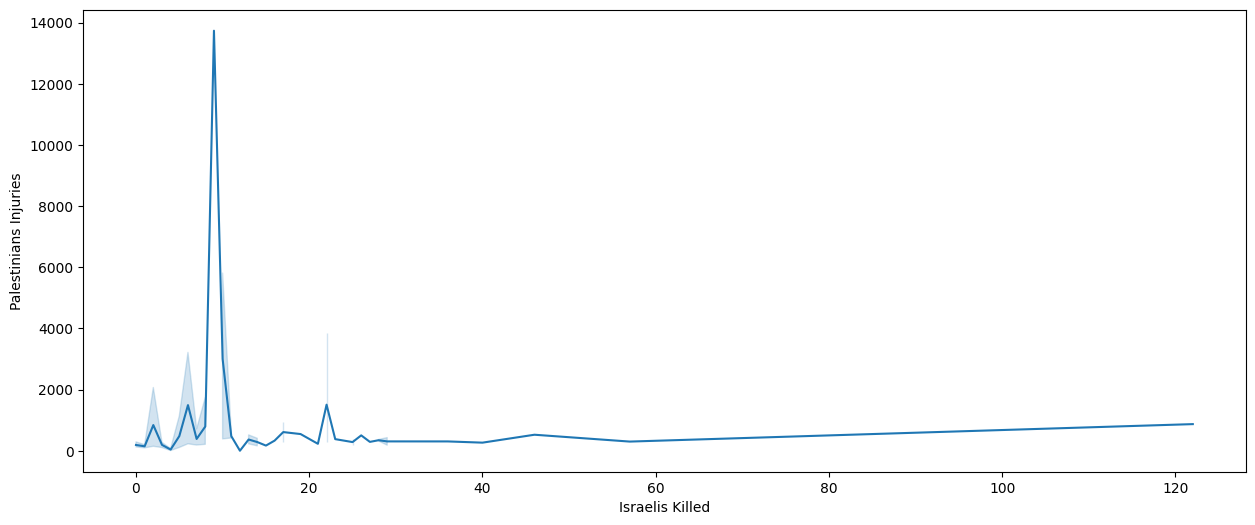

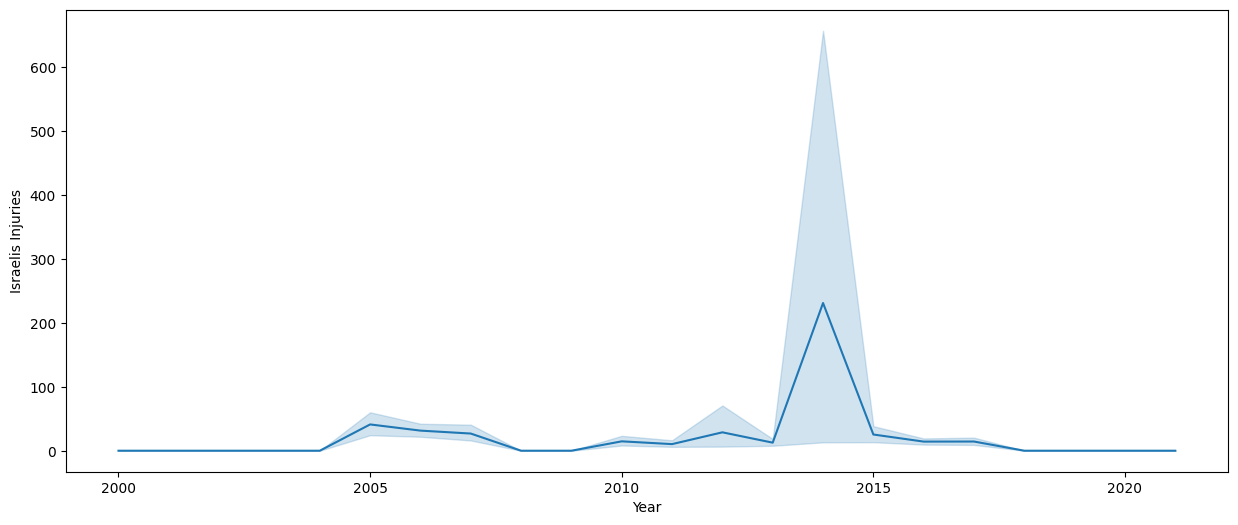

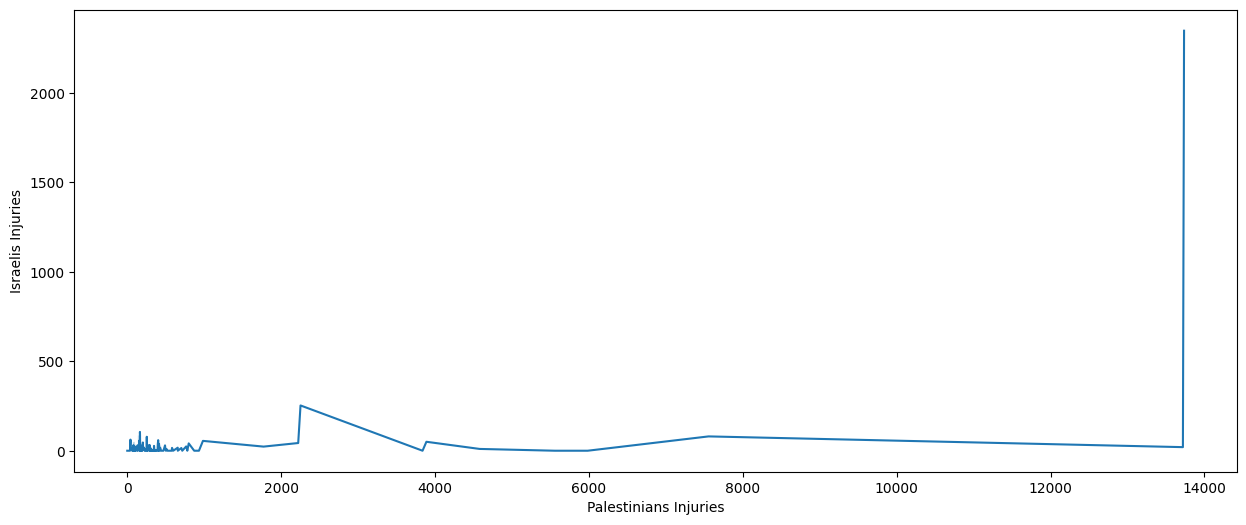

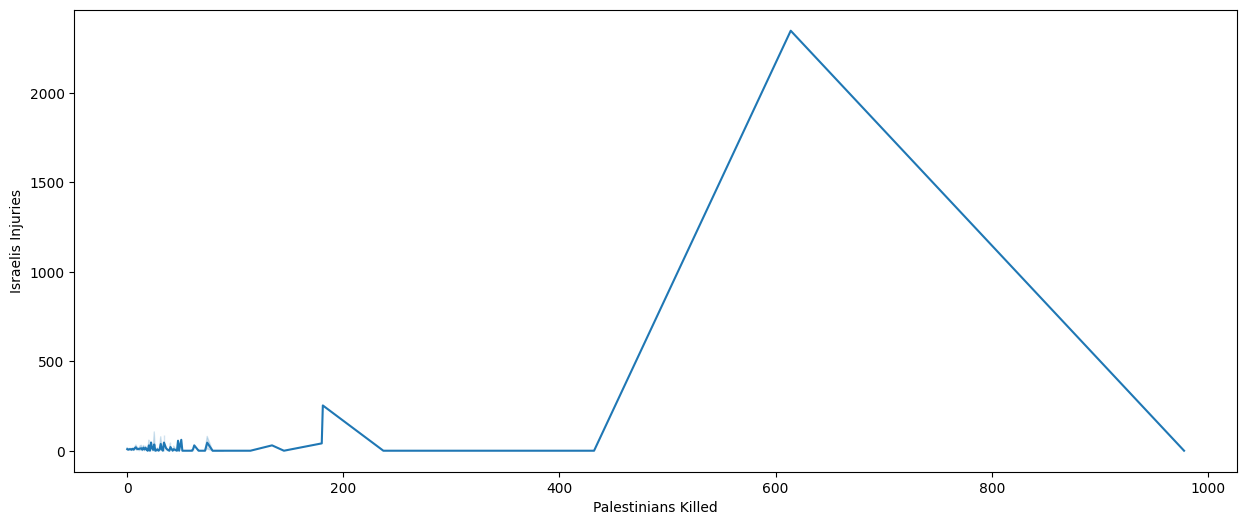

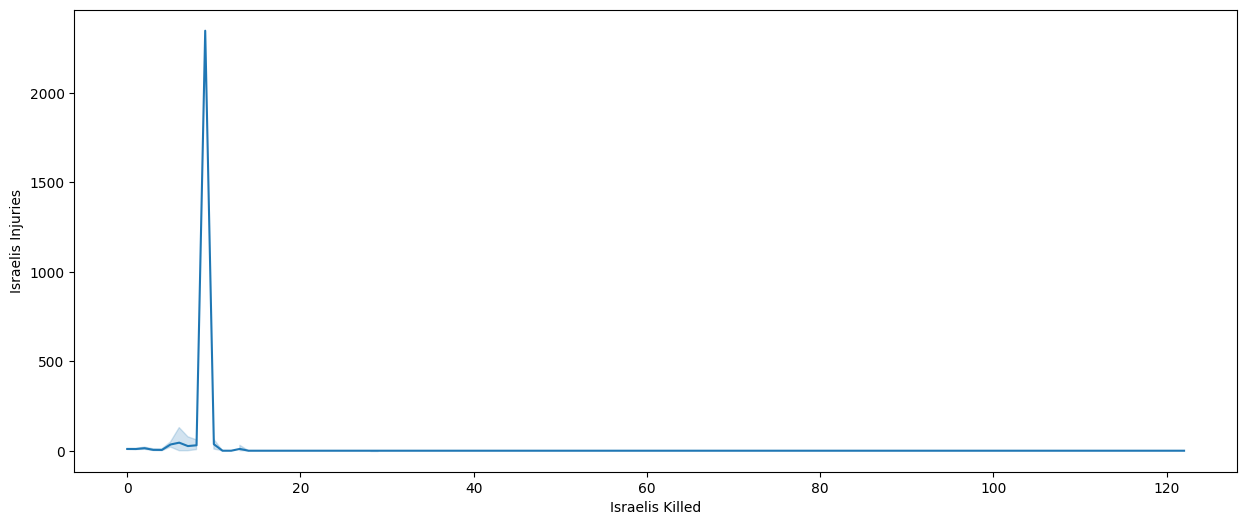

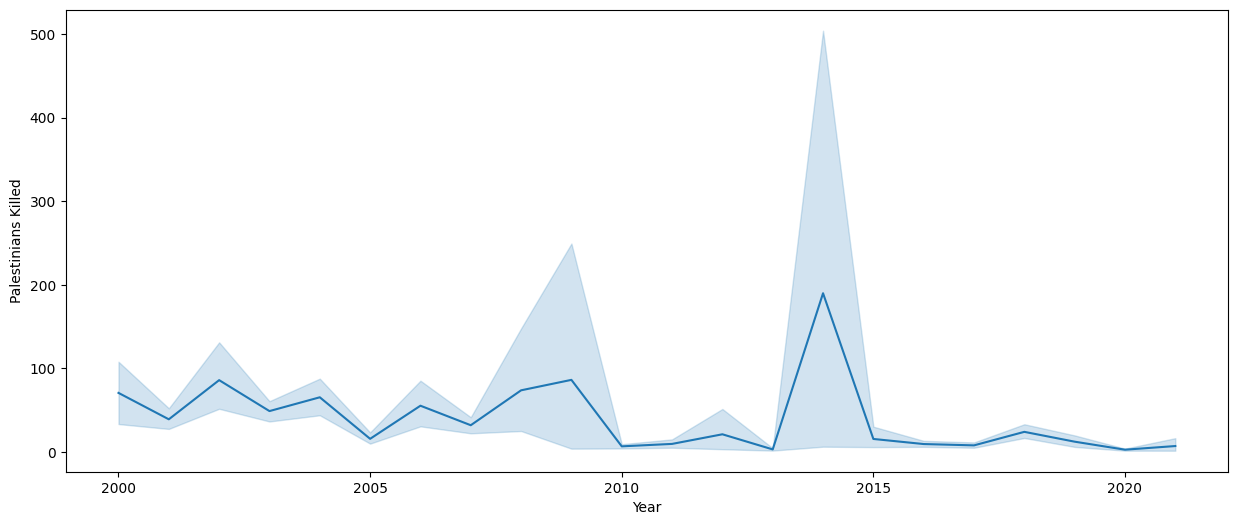

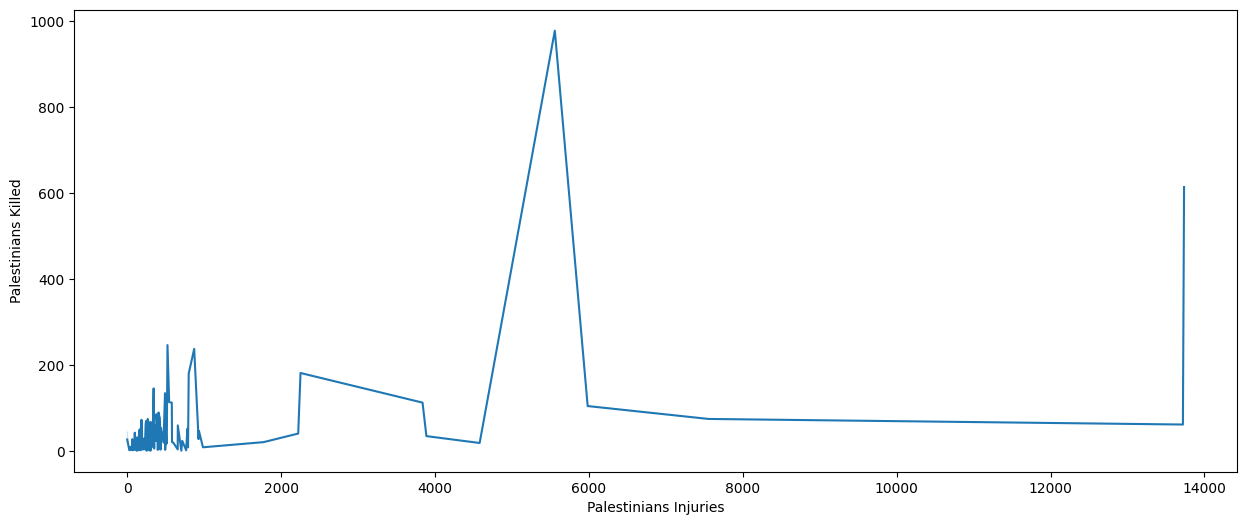

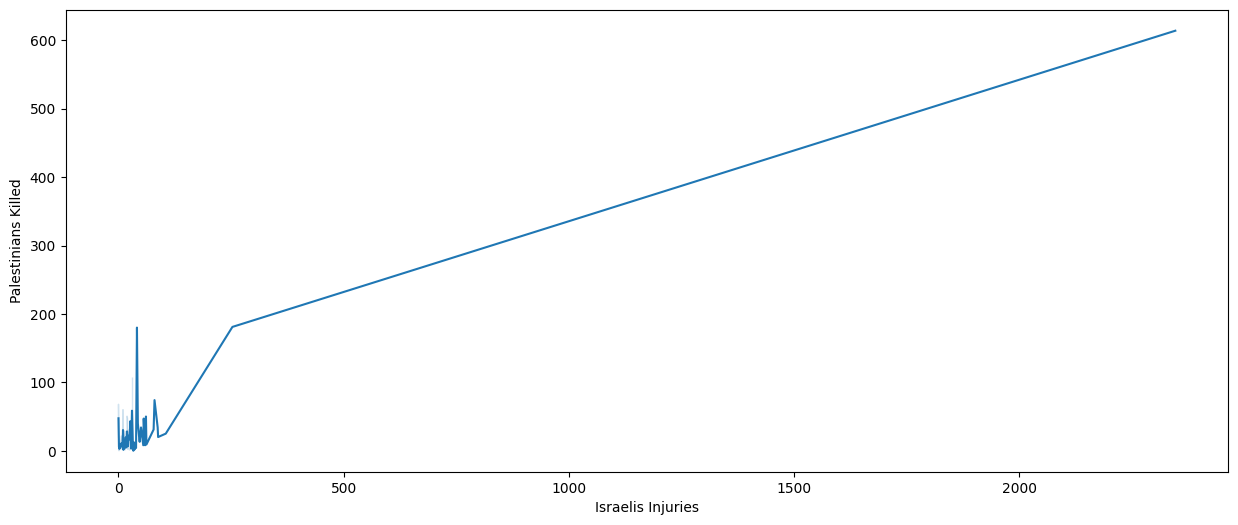

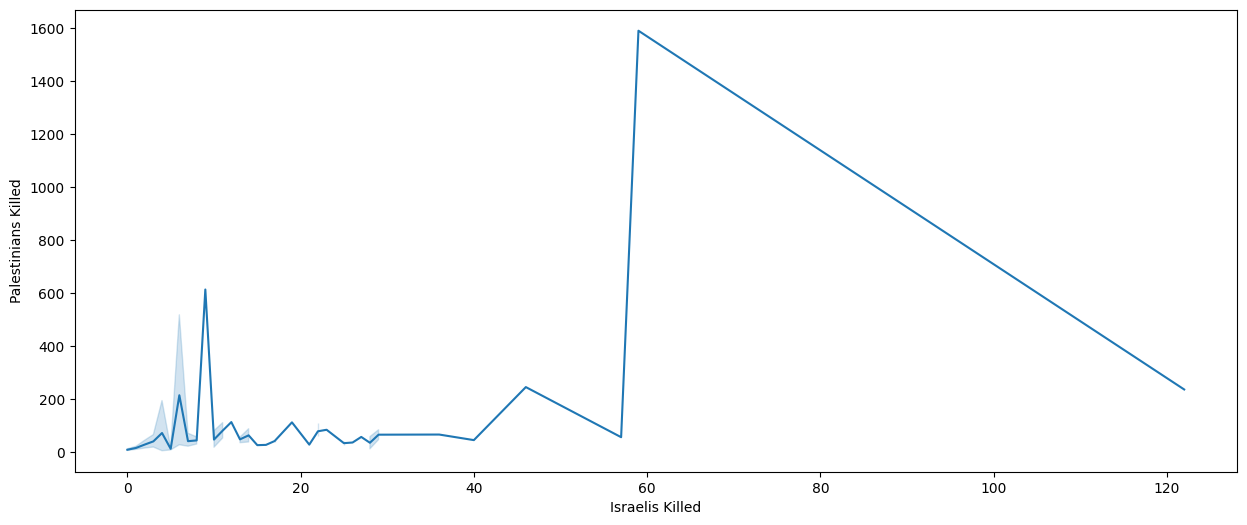

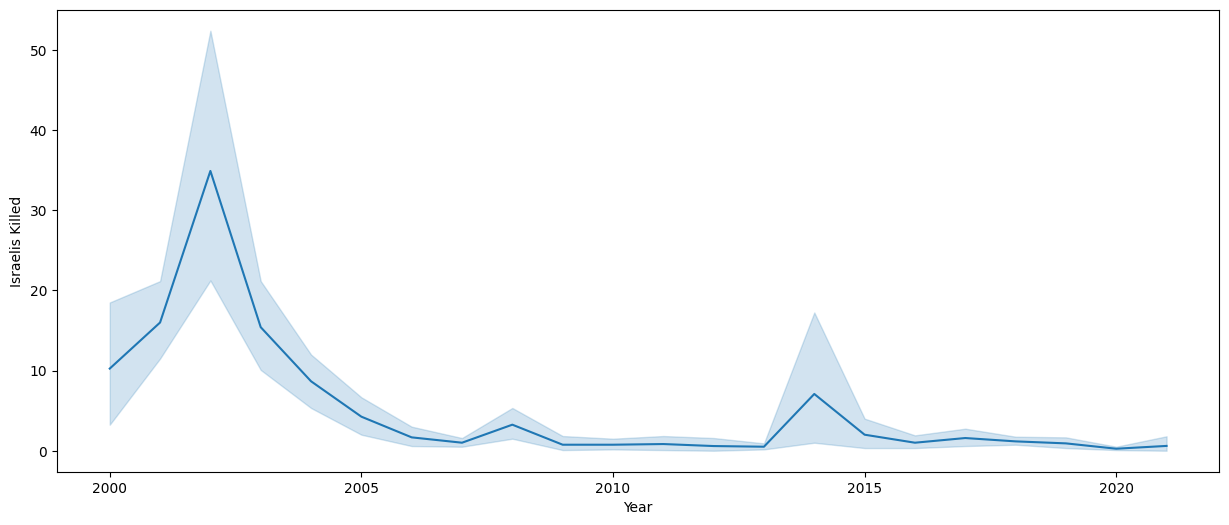

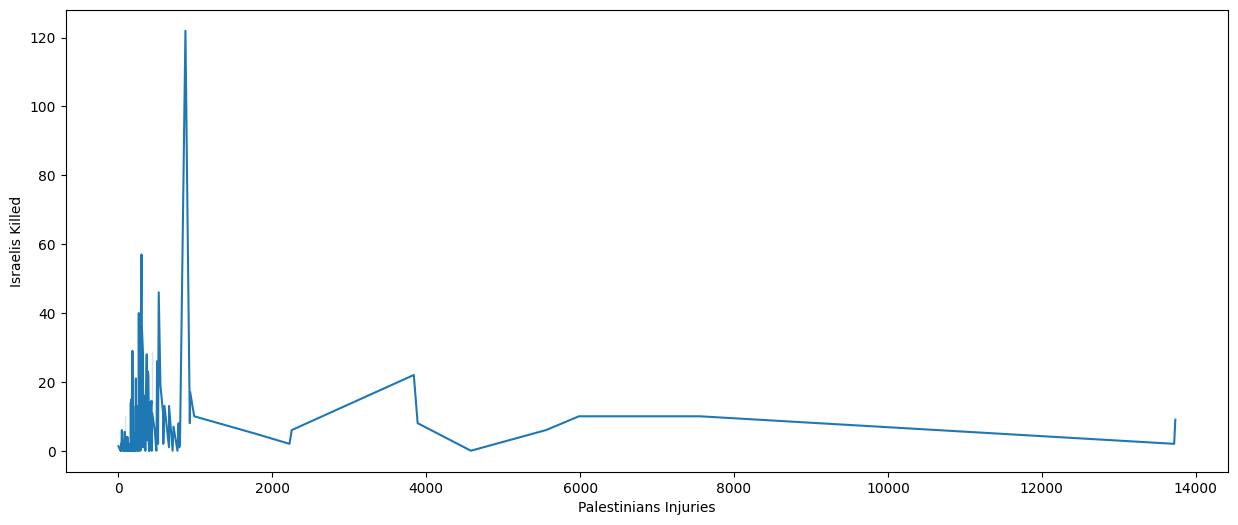

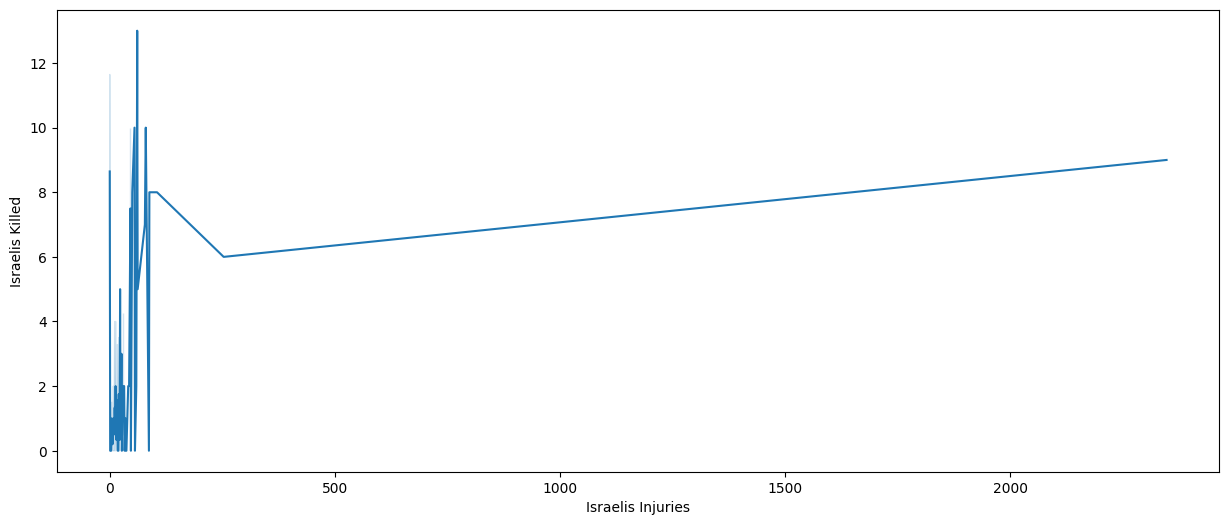

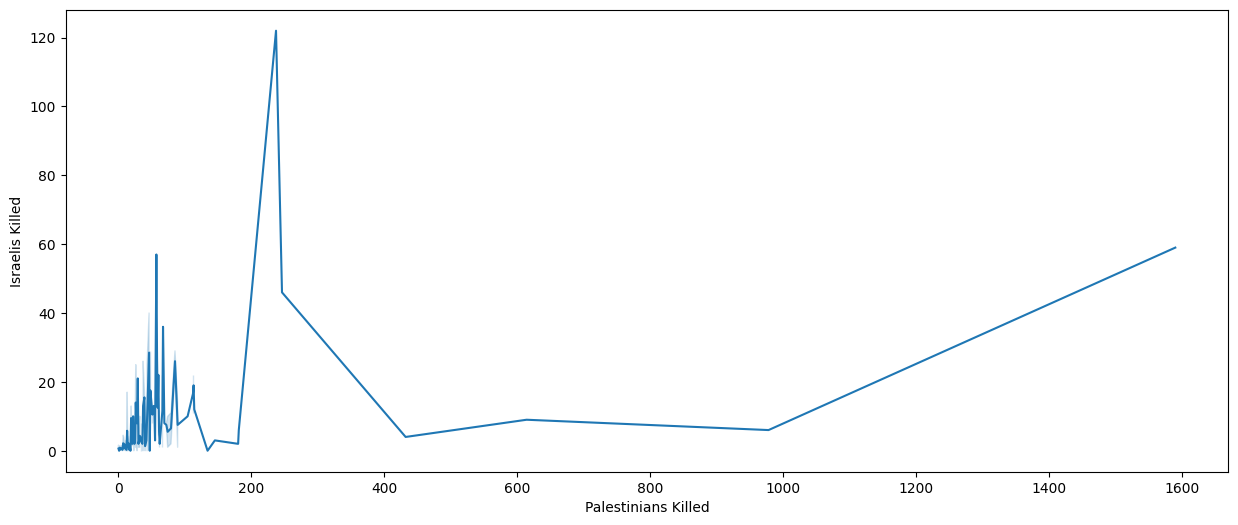

In [60]:
for i in df1.columns:
    for j in df1.columns:
        if i != j:
            plt.figure(figsize=(15,6))
            sns.lineplot(x = df1[j], y = df1[i], data = df1, palette = 'hls')
            plt.show()

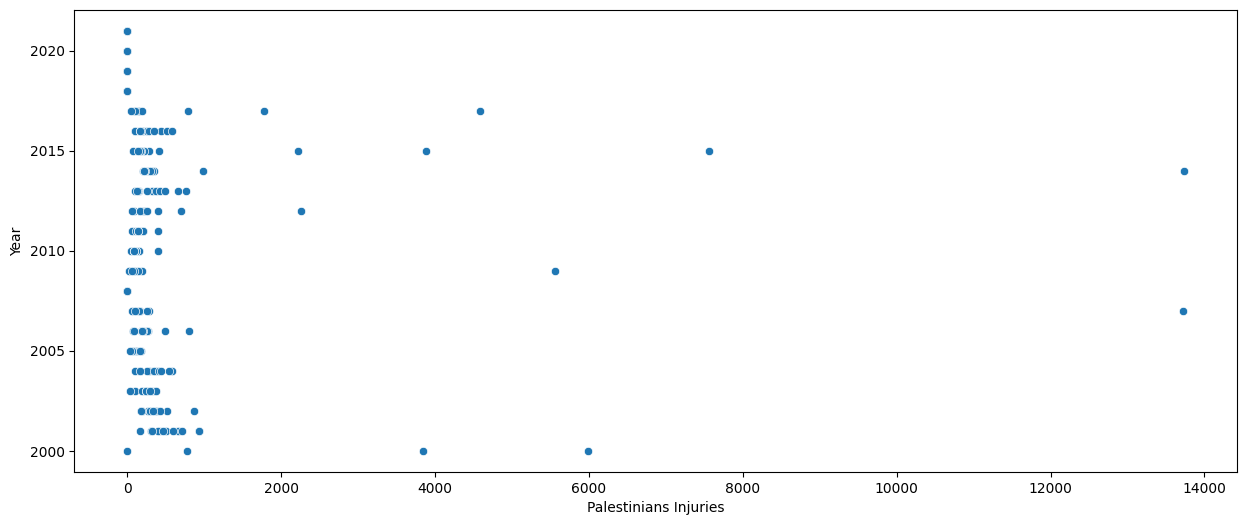

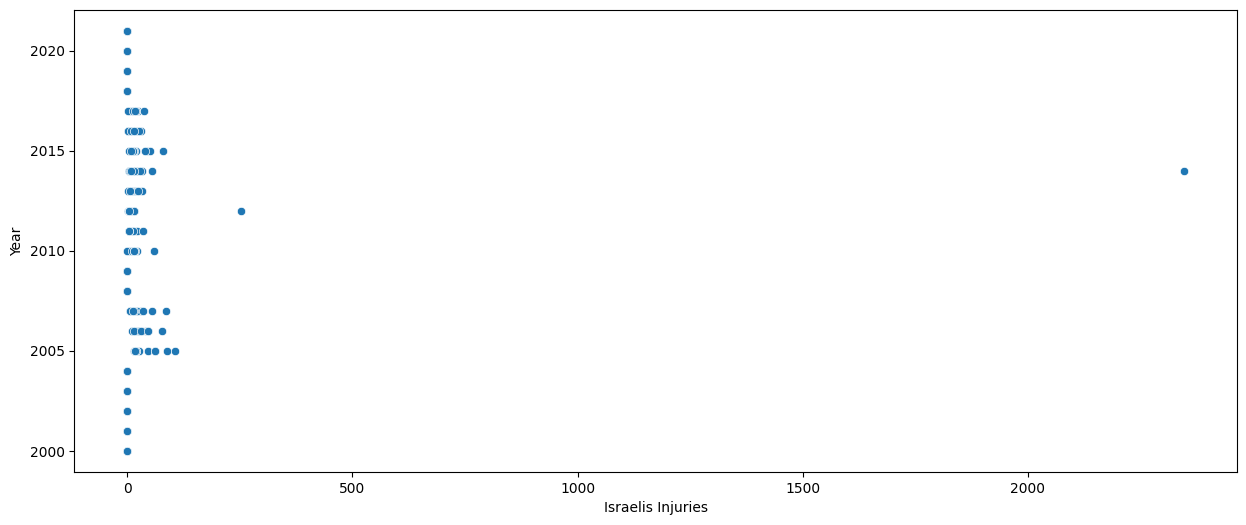

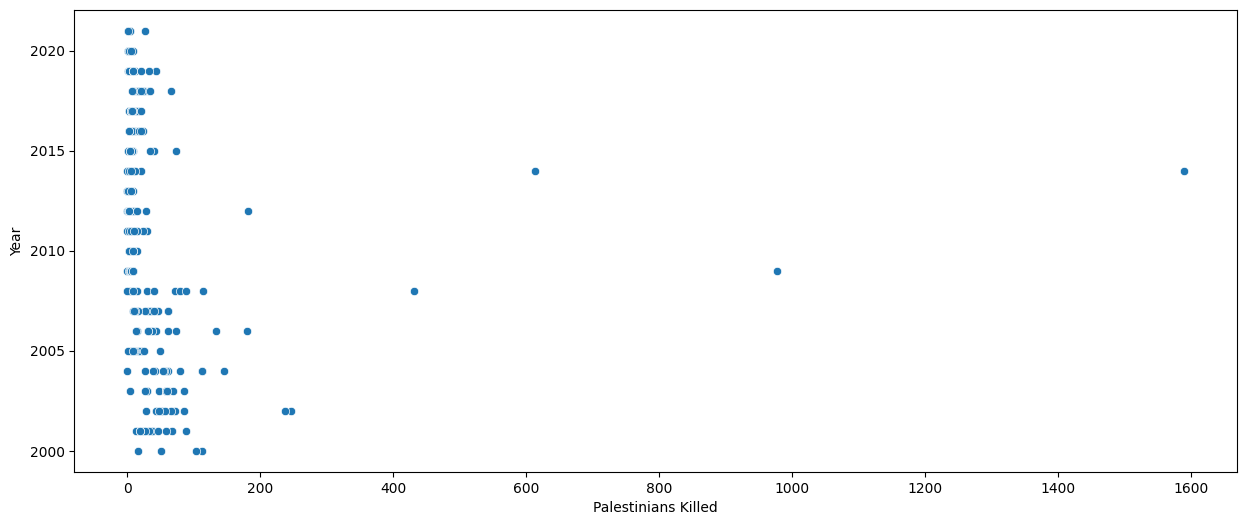

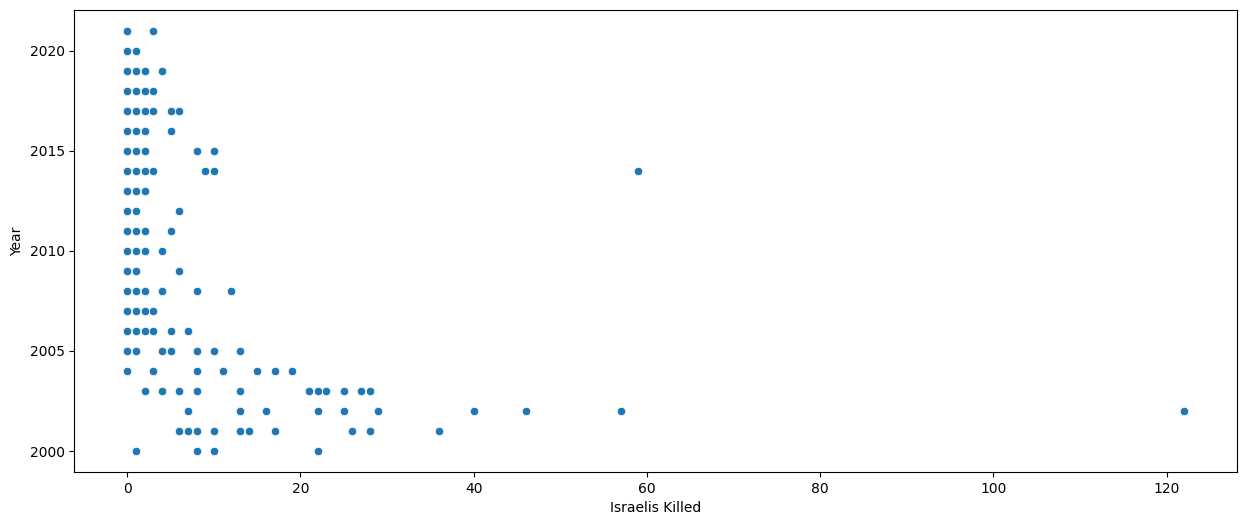

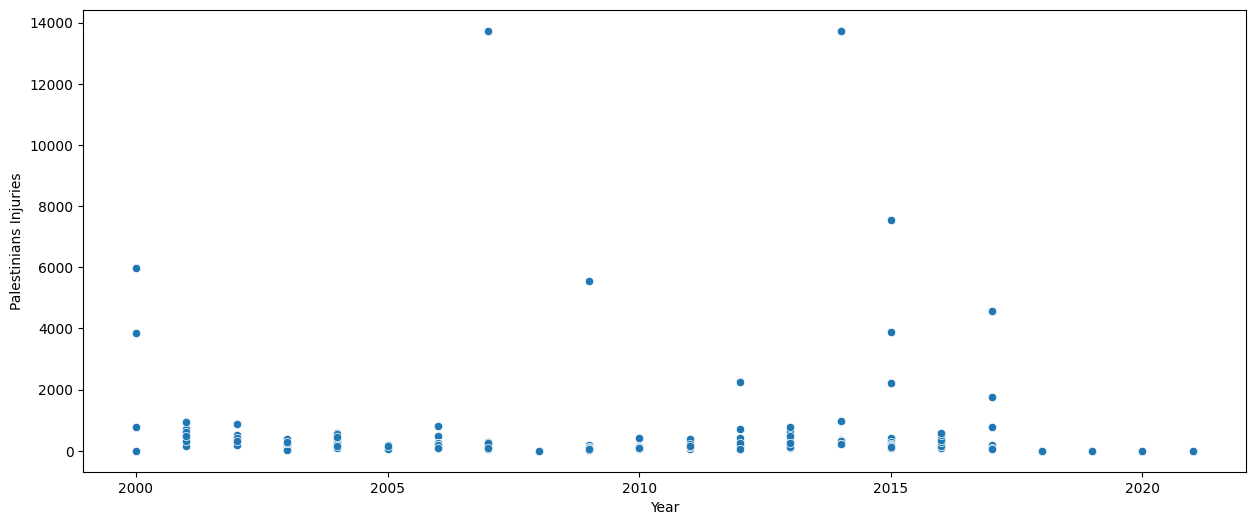

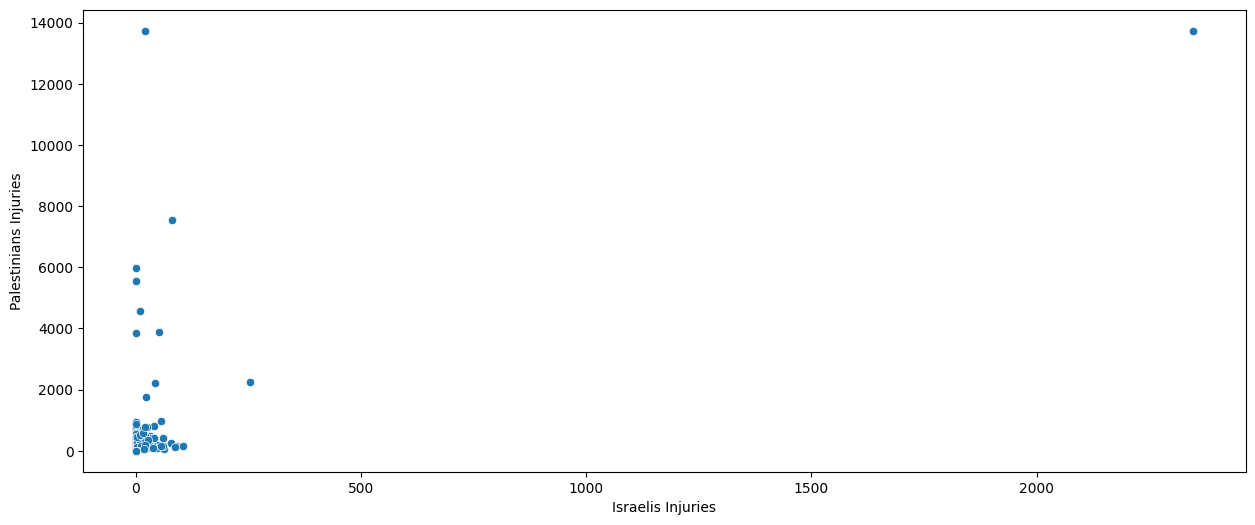

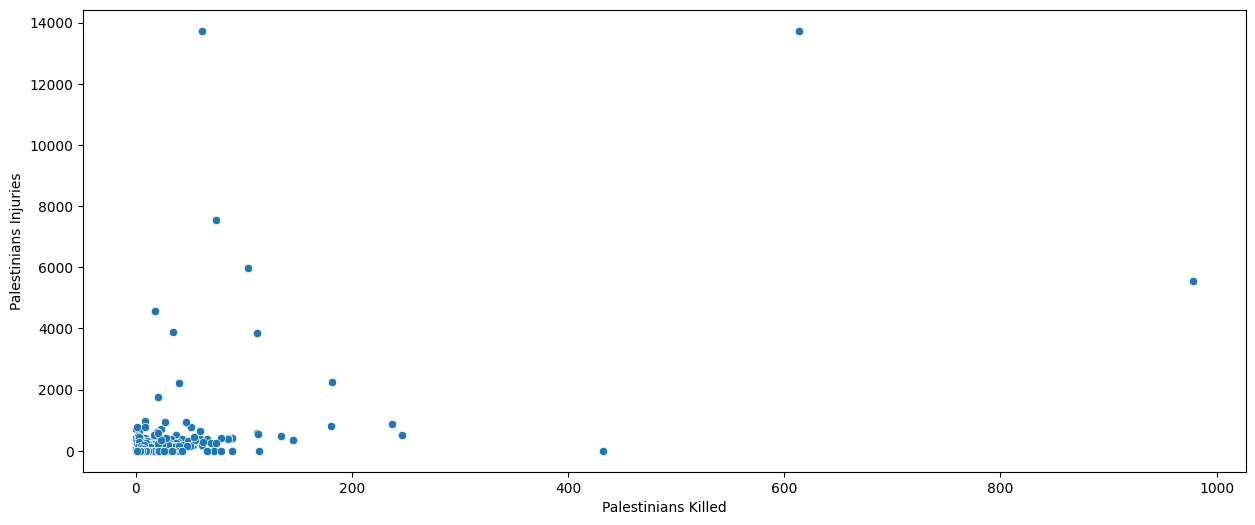

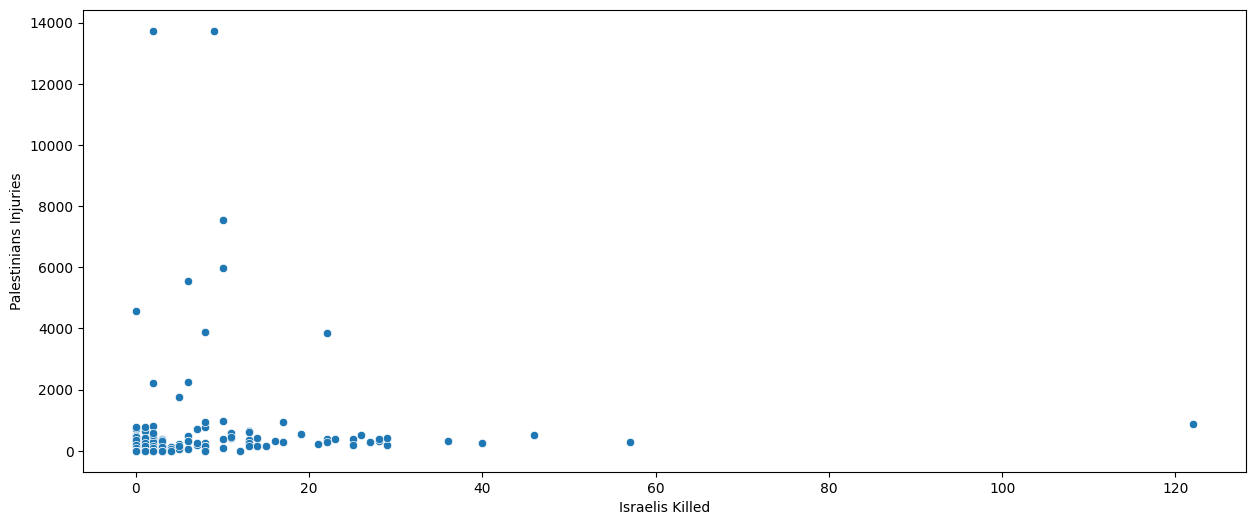

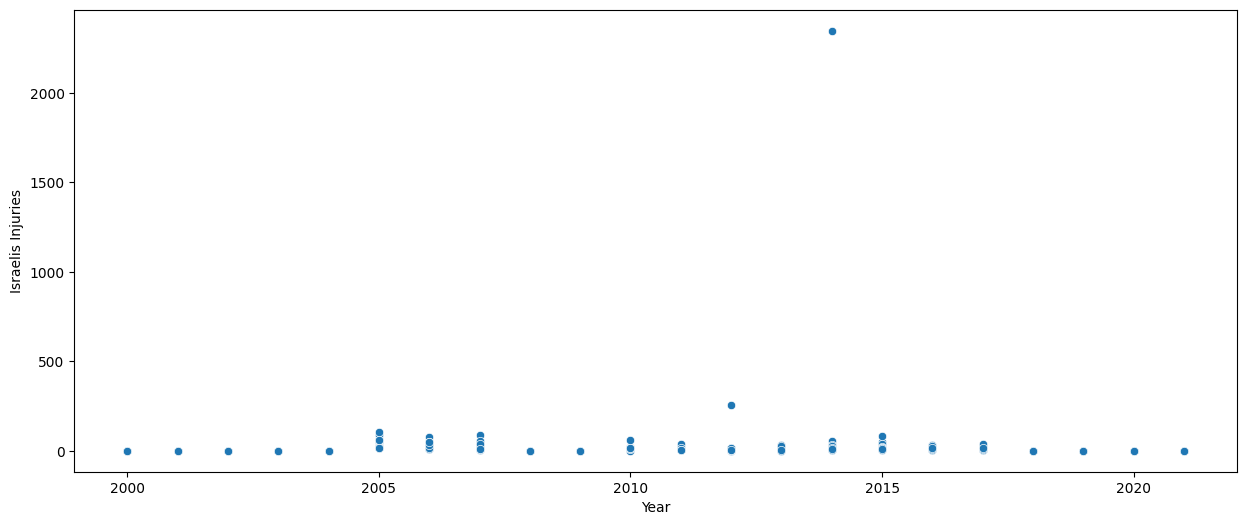

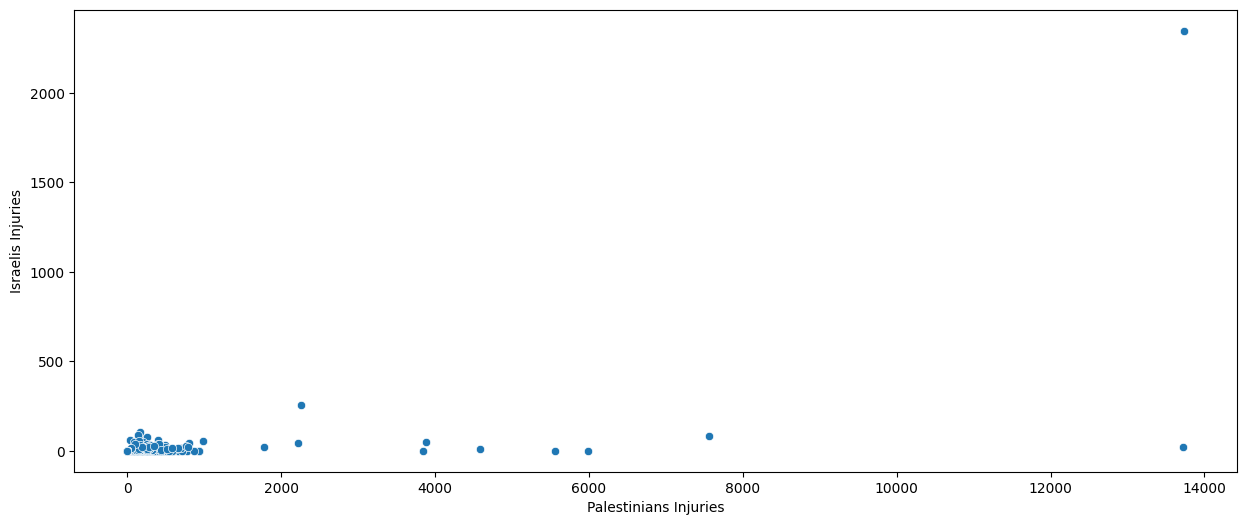

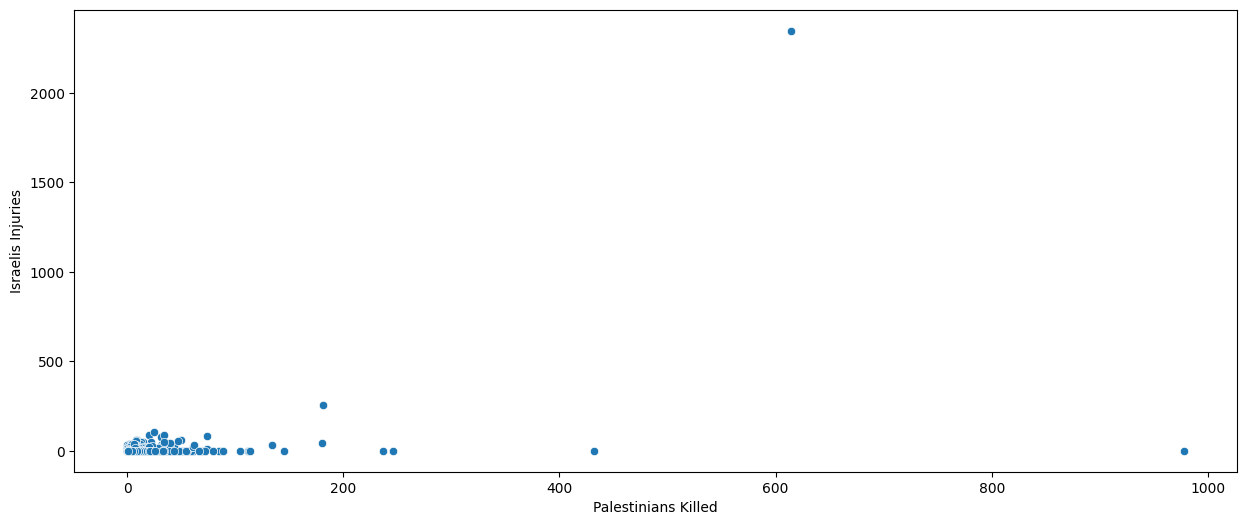

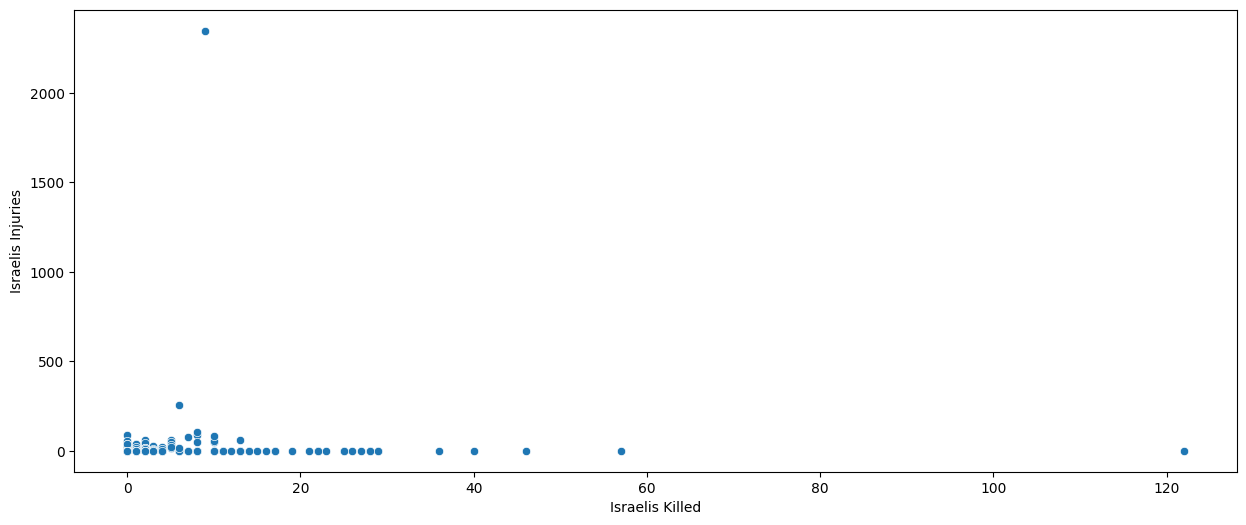

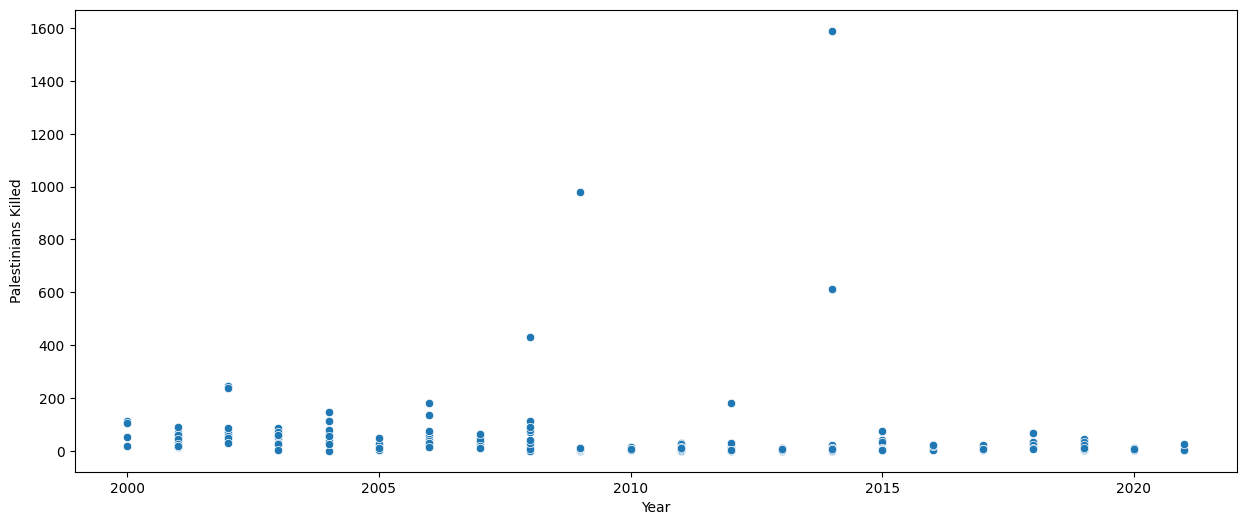

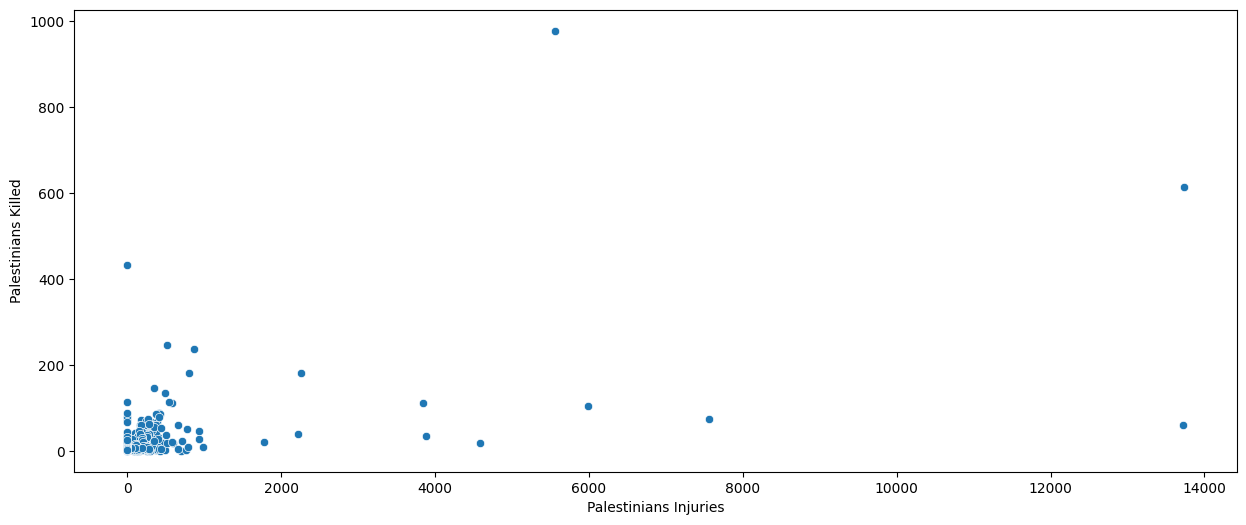

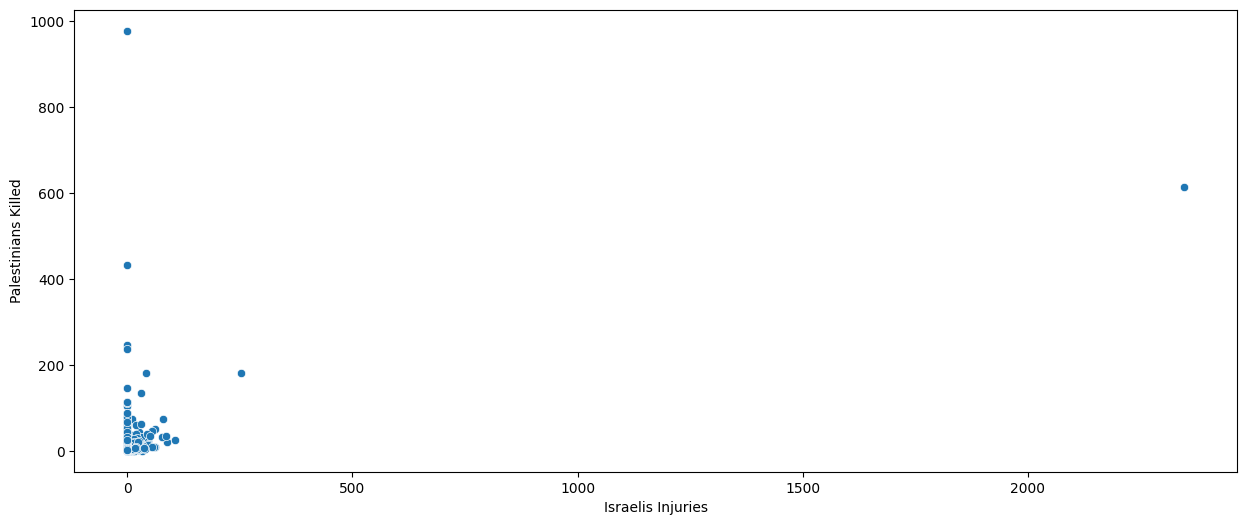

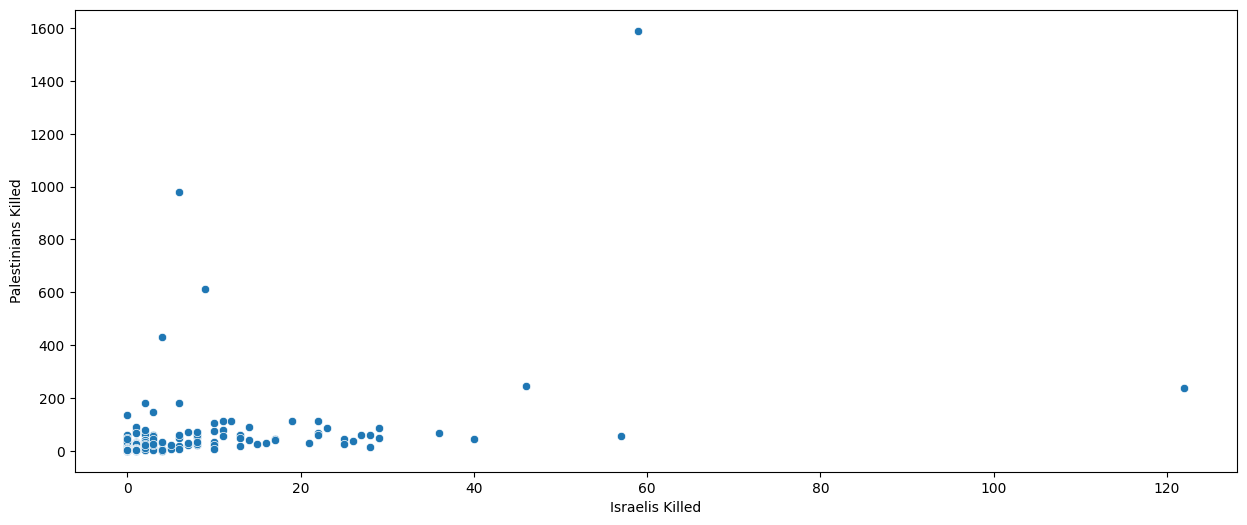

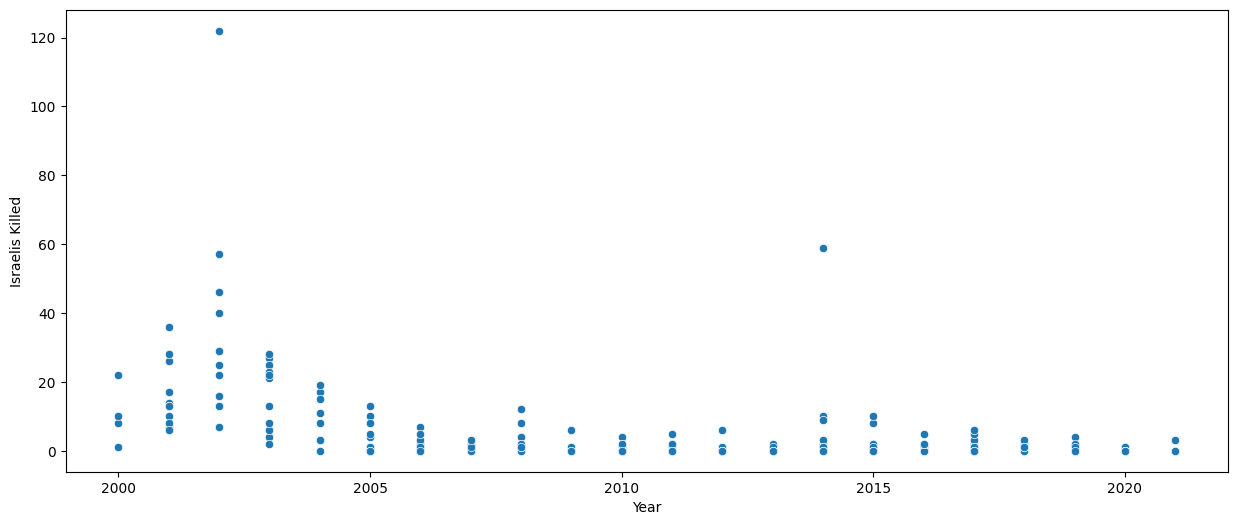

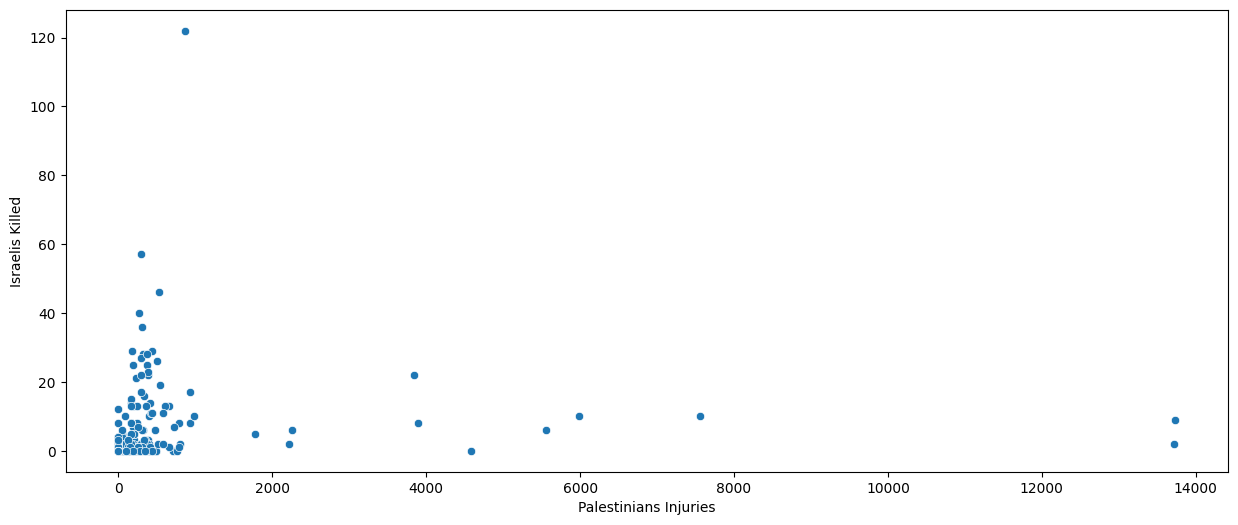

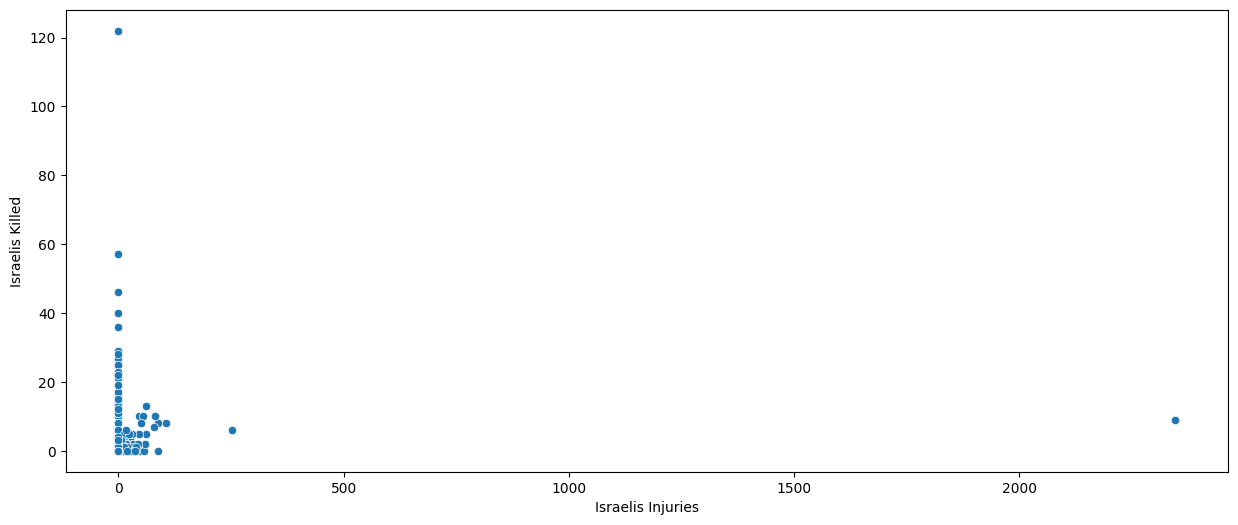

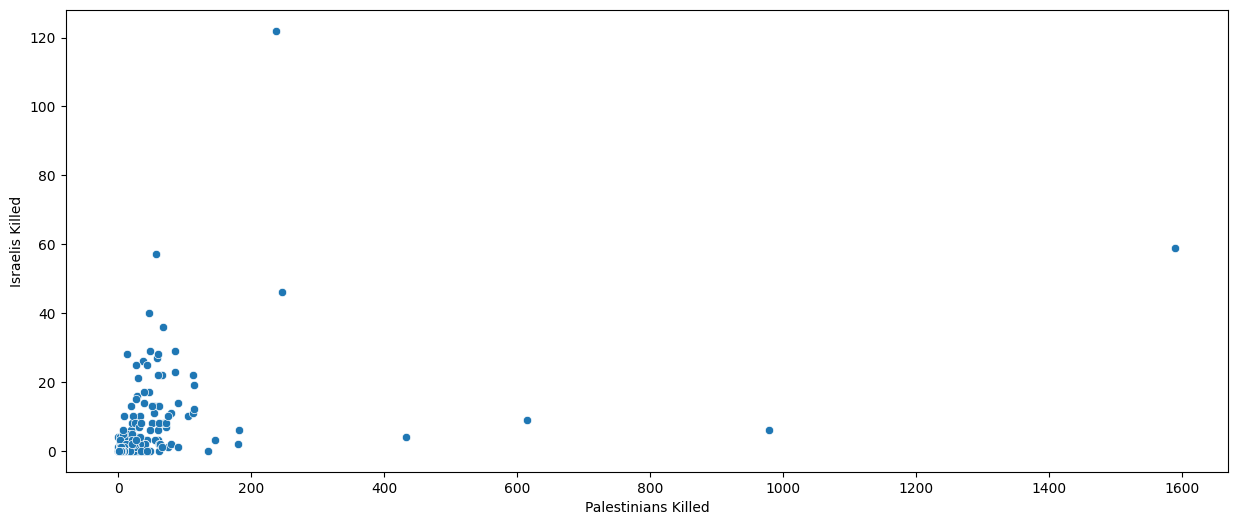

In [59]:
for i in df1.columns:
    for j in df1.columns:
        if i != j:
            plt.figure(figsize=(15,6))
            sns.scatterplot(x = df1[j], y = df1[i], data = df1, palette = 'hls')
            plt.show()

In [58]:
for i in df1.columns:
    for j in df1.columns:
        if i != j:
            fig = px.line(df1, x=j, y=i, title=f'Line Plot: {i} vs {j}')
            fig.show()

In [57]:
for i in df1.columns:
    for j in df1.columns:
        if i != j:
            fig = px.scatter(df1, x=j, y=i, title=f'Scatter Plot: {i} vs {j}')
            fig.show()

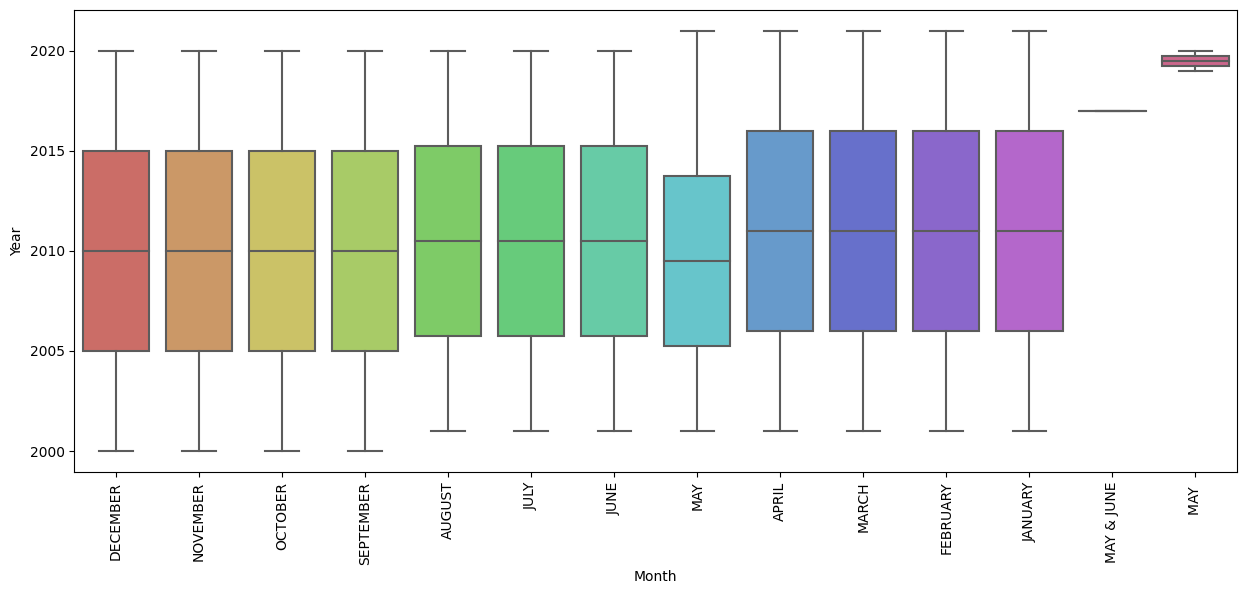

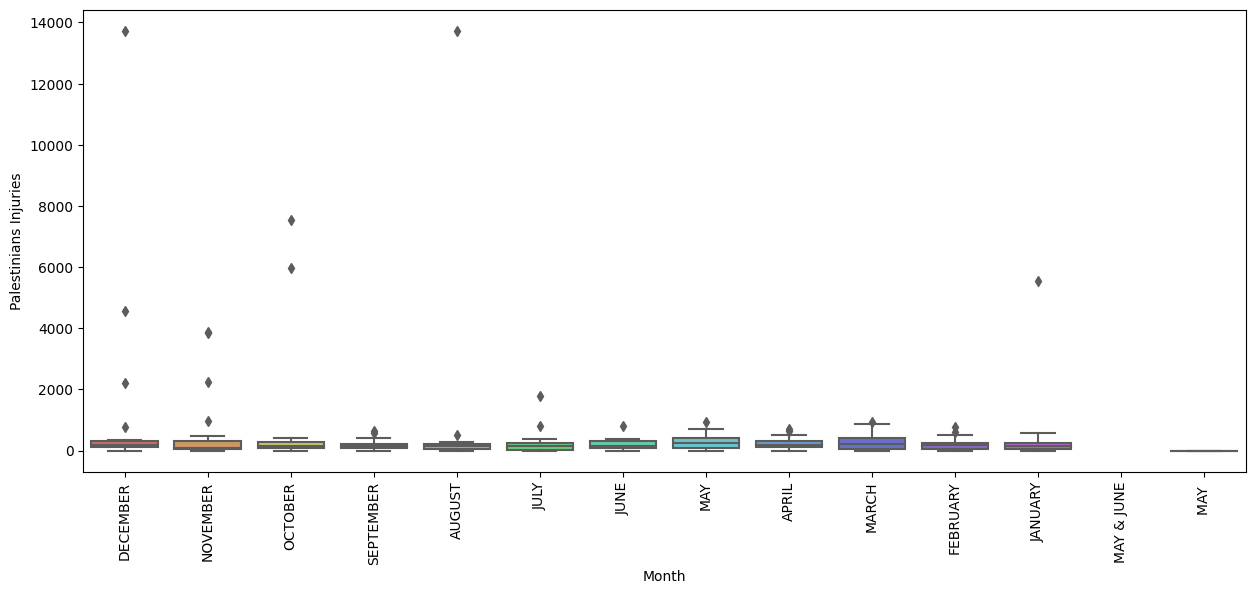

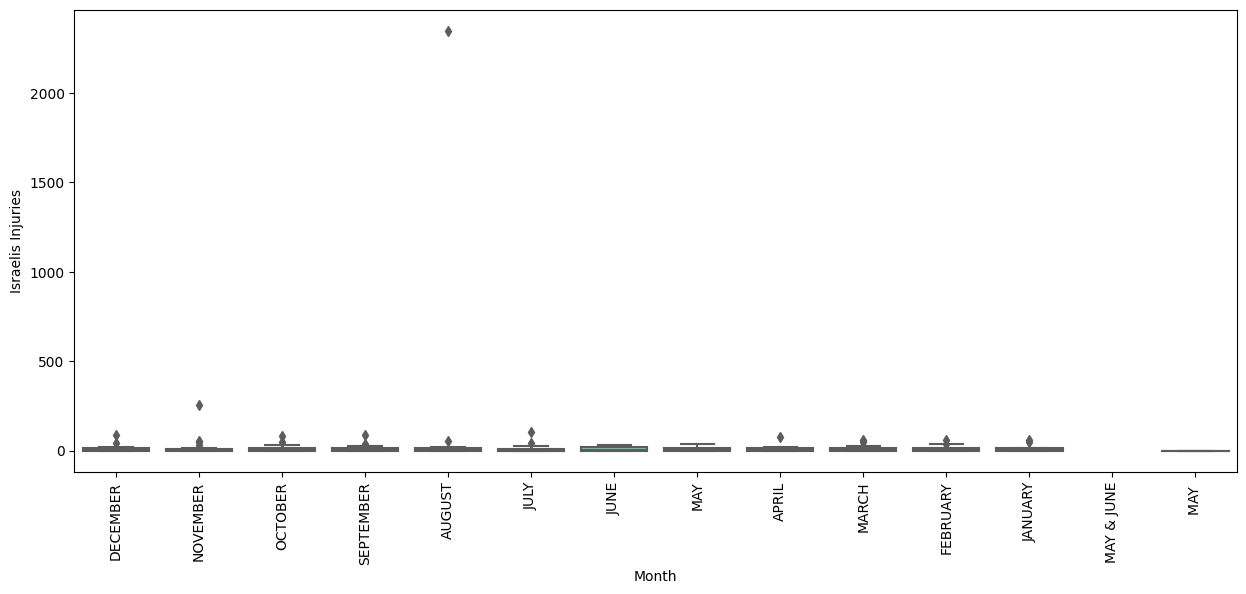

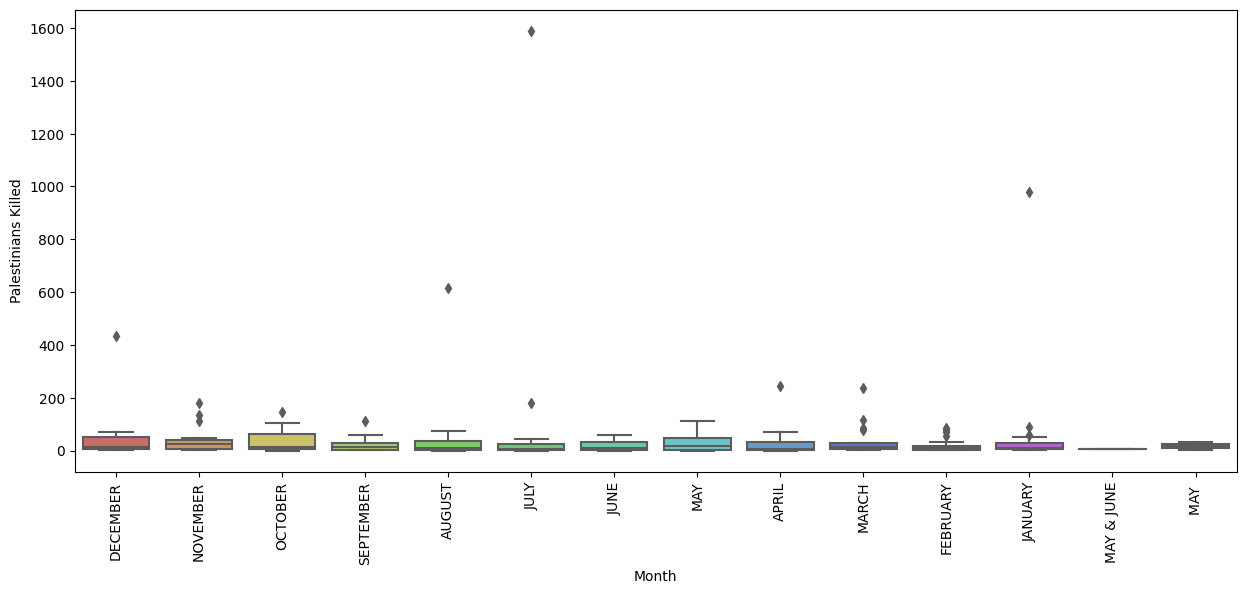

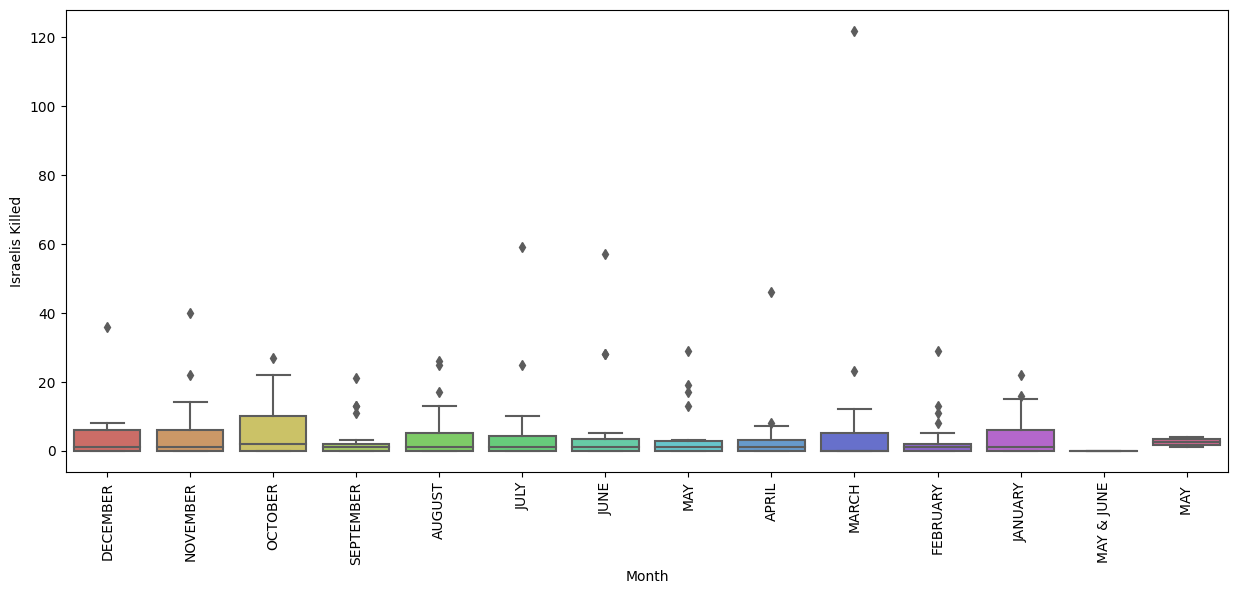

In [56]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x = df['Month'] , y = df1[i] , data = df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

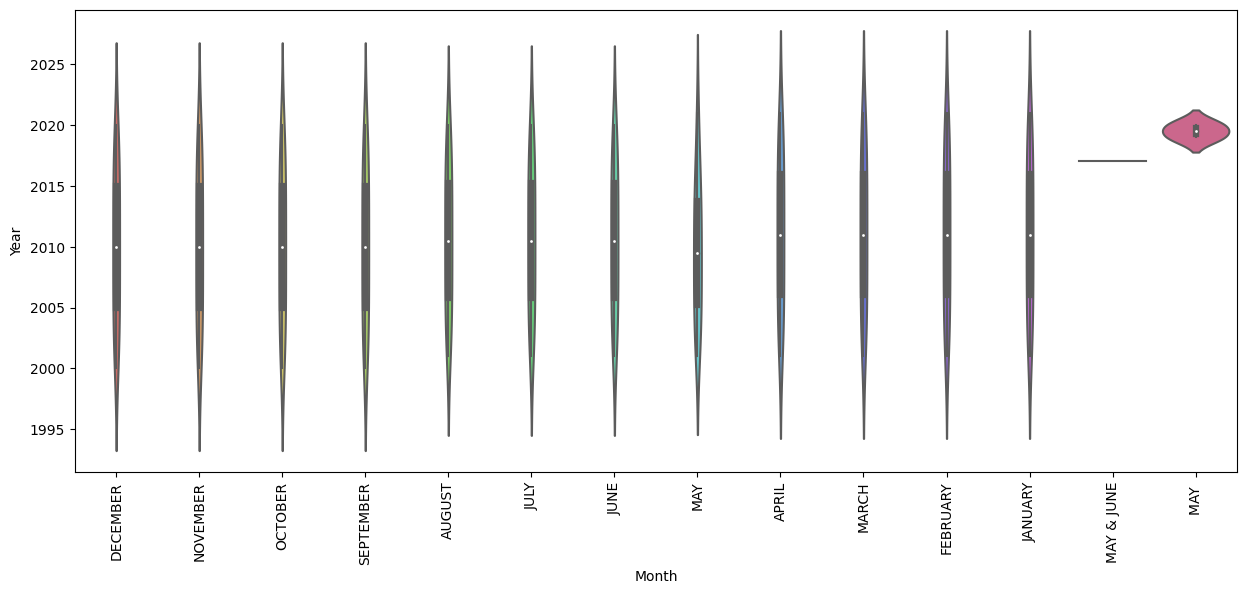

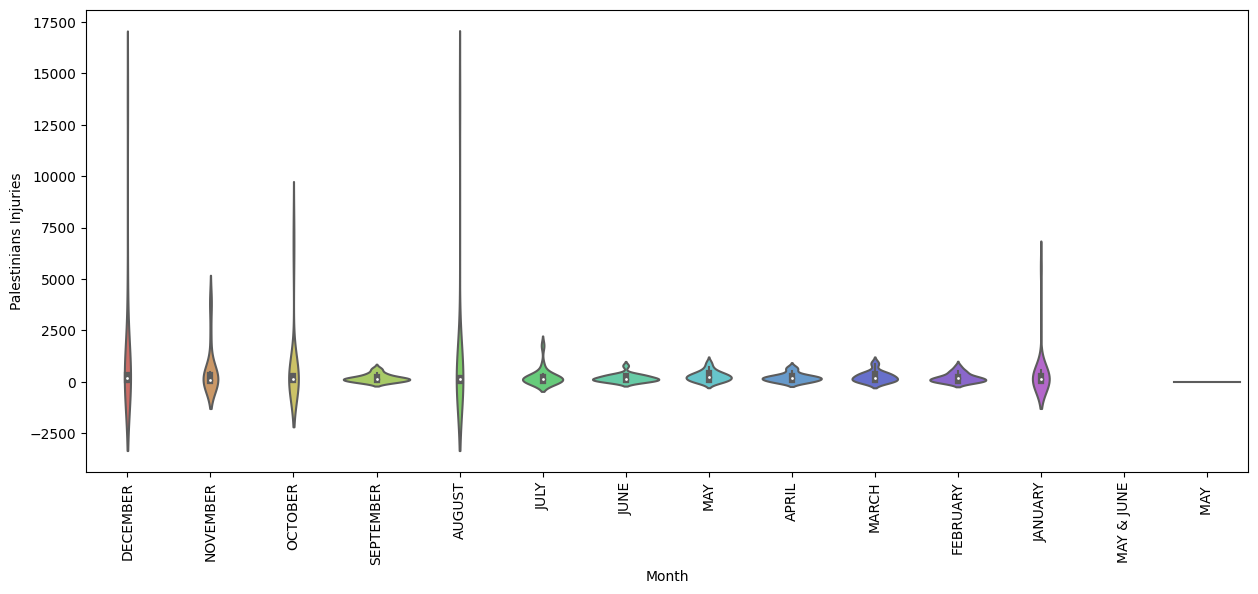

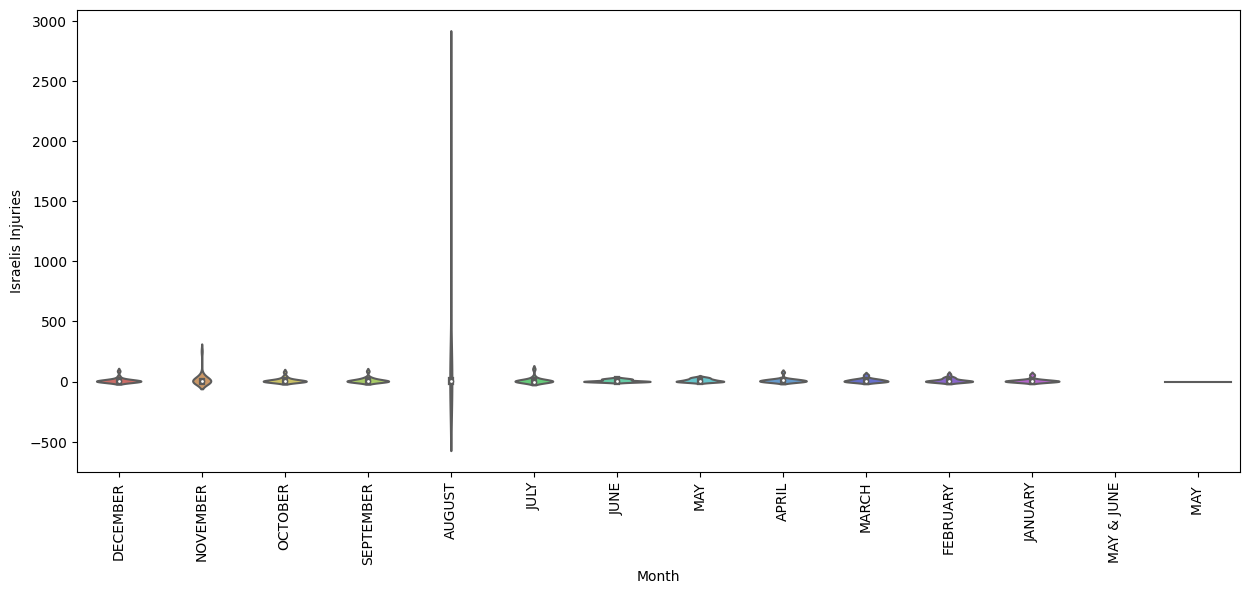

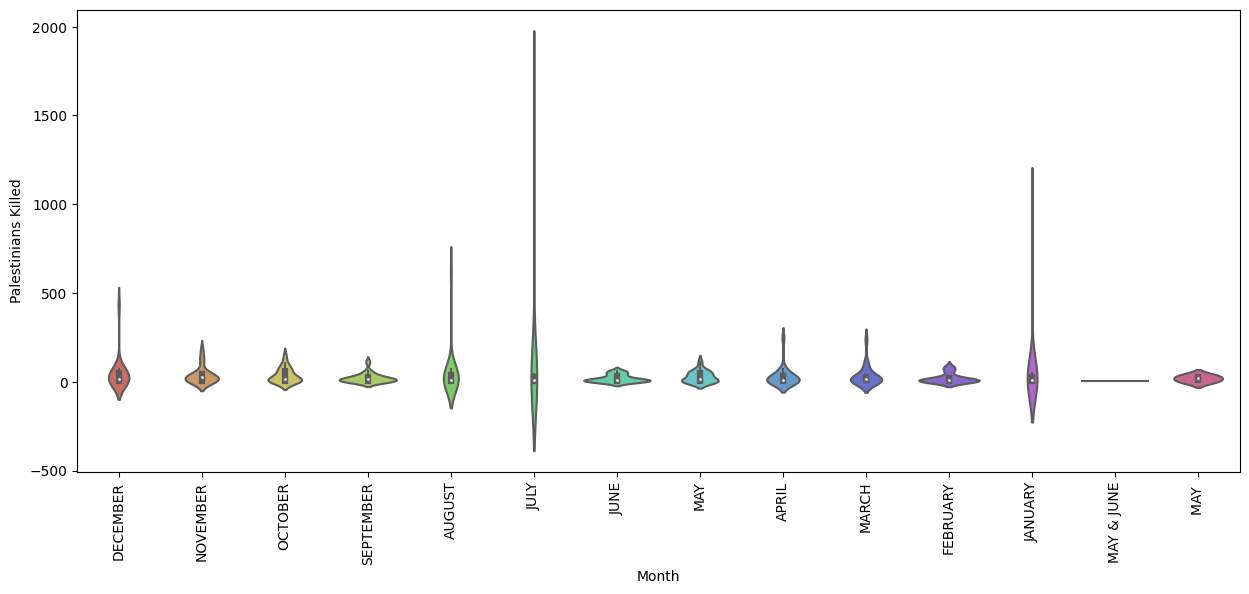

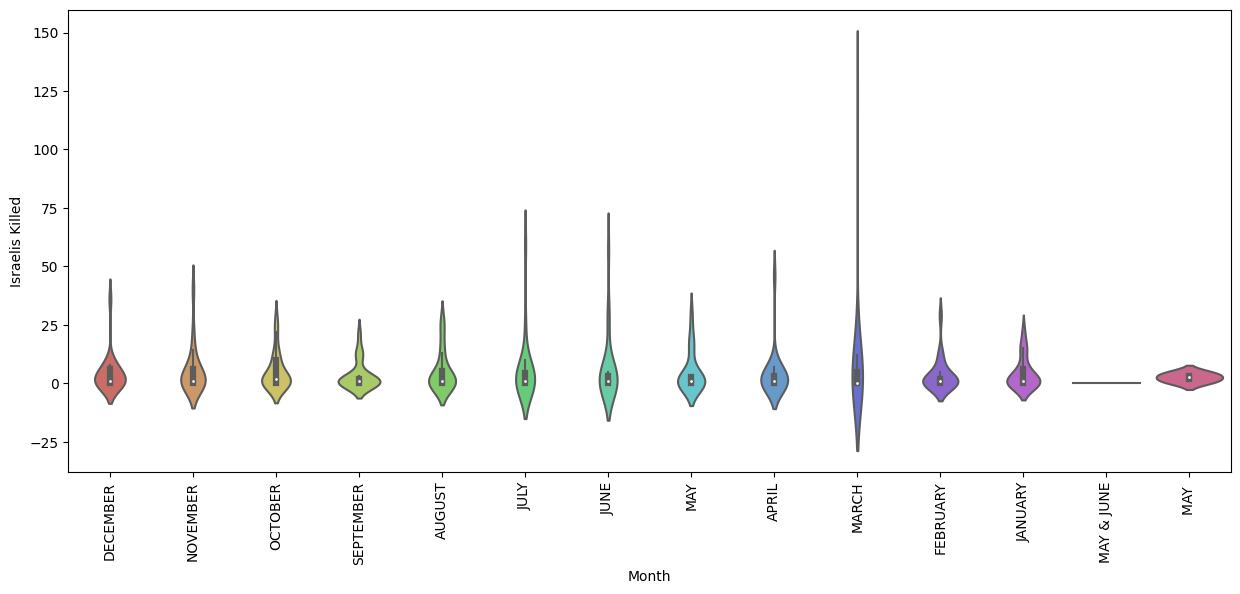

In [55]:
for i in df1.columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(x = df['Month'] , y = df1[i] , data = df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [66]:
for i in df1.columns:
    fig = px.box(df1, x=df['Month'], y=i, title=f'Box Plot: {i} by Month')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

In [67]:
for i in df1.columns:
    fig = px.violin(df1, x=df['Month'], y=i, title=f'Box Plot: {i} by Month')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

In [68]:
fig = px.line(df, x='Year', y=['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed'], title='Trends Over Years')
fig.show()

In [69]:
fig = px.line(df, x='Month', y=['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed'], title='Trends Over Months')
fig.show()

In [70]:
for i in ['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']:
    fig = px.box(df, x='Month', y=i, title=f'Box Plot: {i} by Month')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

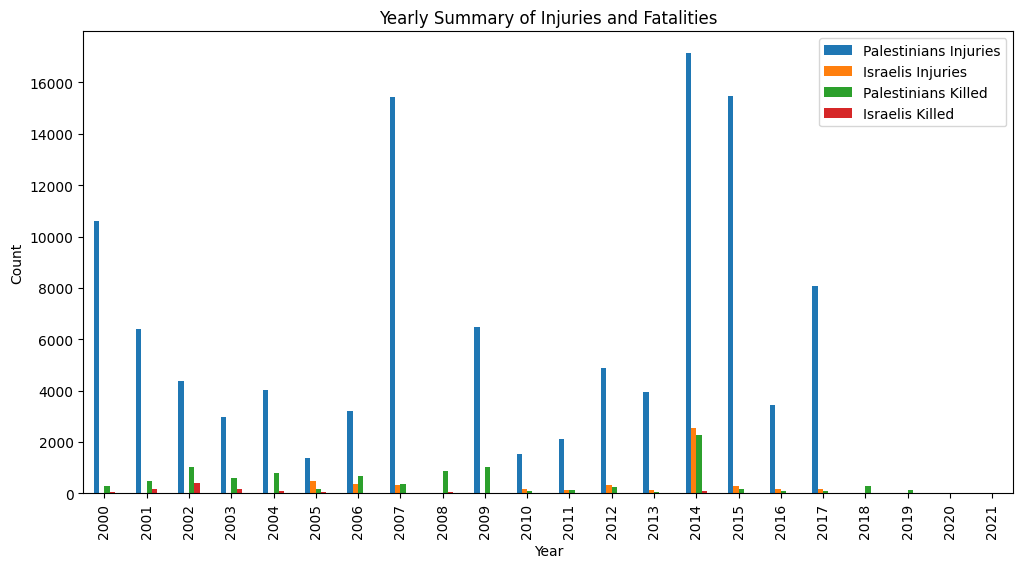

In [71]:
yearly_summary = df.groupby('Year')[['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']].sum()
yearly_summary.plot(kind='bar', figsize=(12, 6), title='Yearly Summary of Injuries and Fatalities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

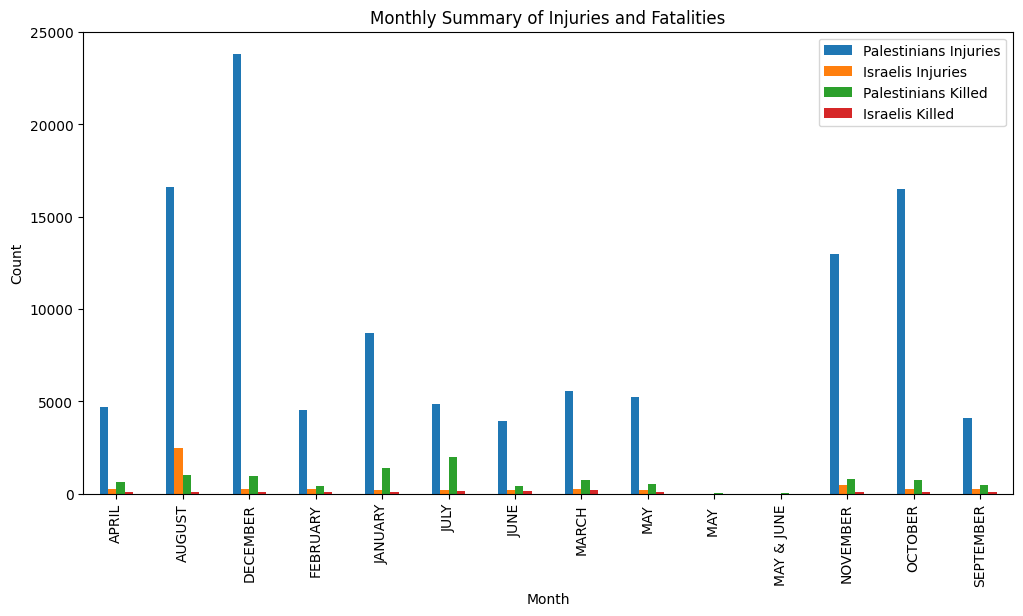

In [72]:
monthly_summary = df.groupby('Month')[['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']].sum()
monthly_summary.plot(kind='bar', figsize=(12, 6), title='Monthly Summary of Injuries and Fatalities')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [73]:
fig=go.Figure()

In [74]:
fig = go.Figure()

for col in yearly_summary.columns:
    fig.add_trace(go.Bar(x=yearly_summary.index, y=yearly_summary[col], name=col))

fig.update_layout(
    title='Yearly Summary of Injuries and Fatalities',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Count'),
    barmode='stack'
)

fig.show()

In [75]:
fig = go.Figure()

for col in monthly_summary.columns:
    fig.add_trace(go.Bar(x=monthly_summary.index, y=monthly_summary[col], name=col))

fig.update_layout(
    title='Monthly Summary of Injuries and Fatalities',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Count'),
    barmode='stack'
)

fig.show()

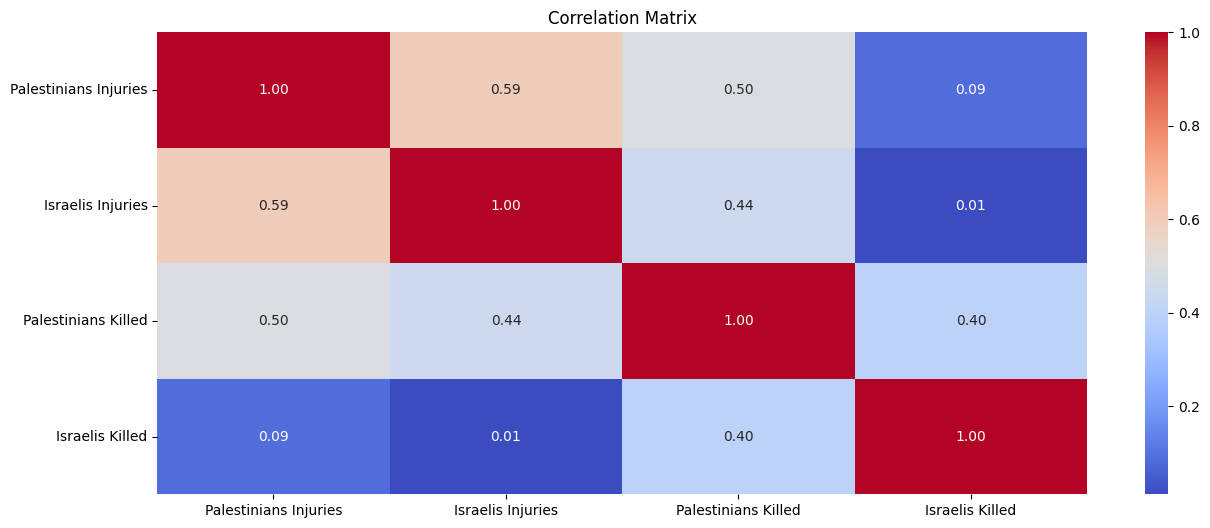

In [76]:
plt.figure(figsize=(15,6))
correlation_matrix = df[['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [77]:
df['Total Incidents'] = df['Palestinians Injuries'] + df['Israelis Injuries'] + df['Palestinians Killed'] + df['Israelis Killed']
df['Palestinian Fatality Rate'] = df['Palestinians Killed'] / df['Total Incidents']
df['Israeli Fatality Rate'] = df['Israelis Killed'] / df['Total Incidents']

In [78]:
total_incidents = df['Total Incidents'].sum()
total_palestinian_incidents = df['Total Incidents'].sum()
total_israeli_incidents = df['Total Incidents'].sum()
palestinian_proportion = total_palestinian_incidents / total_incidents
israeli_proportion = total_israeli_incidents / total_incidents

In [79]:
# final df
df

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed,Total Incidents,Palestinian Fatality Rate,Israeli Fatality Rate
0,2000,DECEMBER,781.0,0.0,51,8,840.0,0.060714,0.009524
1,2000,NOVEMBER,3838.0,0.0,112,22,3972.0,0.028197,0.005539
2,2000,OCTOBER,5984.0,0.0,104,10,6098.0,0.017055,0.001640
3,2000,SEPTEMBER,0.0,0.0,16,1,17.0,0.941176,0.058824
4,2001,DECEMBER,304.0,0.0,67,36,407.0,0.164619,0.088452
...,...,...,...,...,...,...,...,...,...
244,2021,JANUARY,0.0,0.0,4,0,4.0,1.000000,0.000000
245,2021,FEBRUARY,0.0,0.0,1,0,1.0,1.000000,0.000000
246,2021,MARCH,0.0,0.0,4,0,4.0,1.000000,0.000000
247,2021,APRIL,0.0,0.0,1,0,1.0,1.000000,0.000000
